# Comparison of Classical ML Models and MLPs

# Porównanie klasycznych modeli uczenia maszynowego i sztucznych sieci neuronowych (mlp) zastosowanych do rozwiązywania konkretnych problemów

---

Dataset: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

---

**Gender:** Płeć pasażerów (Kobieta, Mężczyzna)

**Customer Type:** Typ klienta (Stały klient, Niestały klient)

**Age:** Wiek pasażerów

**Type of Travel:** Cel podróży pasażerów (Podróż osobista, Podróż służbowa)

**Class:** Klasa podróży pasażerów (Biznes, Ekonomiczna, Ekonomiczna Plus)

**Flight distance:** Dystans lotu tej podróży

**Inflight wifi service:** Poziom zadowolenia z usługi WiFi na pokładzie (0: Nie dotyczy; 1-5)

**Departure/Arrival time convenient:** Poziom zadowolenia z dogodności czasu odlotu/przylotu

**Ease of Online booking:** Poziom zadowolenia z łatwości rezerwacji online

**Gate location:** Poziom zadowolenia z lokalizacji bramki

**Food and drink:** Poziom zadowolenia z jedzenia i napojów

**Online boarding:** Poziom zadowolenia z odprawy online

**Seat comfort:** Poziom zadowolenia z komfortu siedzeń

**Inflight entertainment:** Poziom zadowolenia z rozrywki na pokładzie

**On-board service:** Poziom zadowolenia z obsługi na pokładzie

**Leg room service:** Poziom zadowolenia z przestrzeni na nogi

**Baggage handling:** Poziom zadowolenia z obsługi bagażu

**Check-in service:** Poziom zadowolenia z obsługi podczas odprawy

**Inflight service:** Poziom zadowolenia z usług na pokładzie

**Cleanliness:** Poziom zadowolenia z czystości

**Departure Delay in Minutes:** Minuty opóźnienia przy odlocie

**Arrival Delay in Minutes:** Minuty opóźnienia przy przylocie

***Satisfaction:*** *Poziom satysfakcji z linii lotniczej (Zadowolony, neutralny lub niezadowolony)*

In [2]:
import os
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data preparation

In [ ]:
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
df = pd.concat([pd.read_csv(os.path.join(path, filename)) for filename in os.listdir(path)])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# Cleansing data from unnecessary columns [Unnamed: 0] and [id]
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
# Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 no

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# Missing values
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
# Unique values in each column
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
satisfaction                            2
dtype: int64

In [9]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Customer Type'] = LabelEncoder().fit_transform(df['Customer Type'])
df['Type of Travel'] = LabelEncoder().fit_transform(df['Type of Travel'])
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])

In [9]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


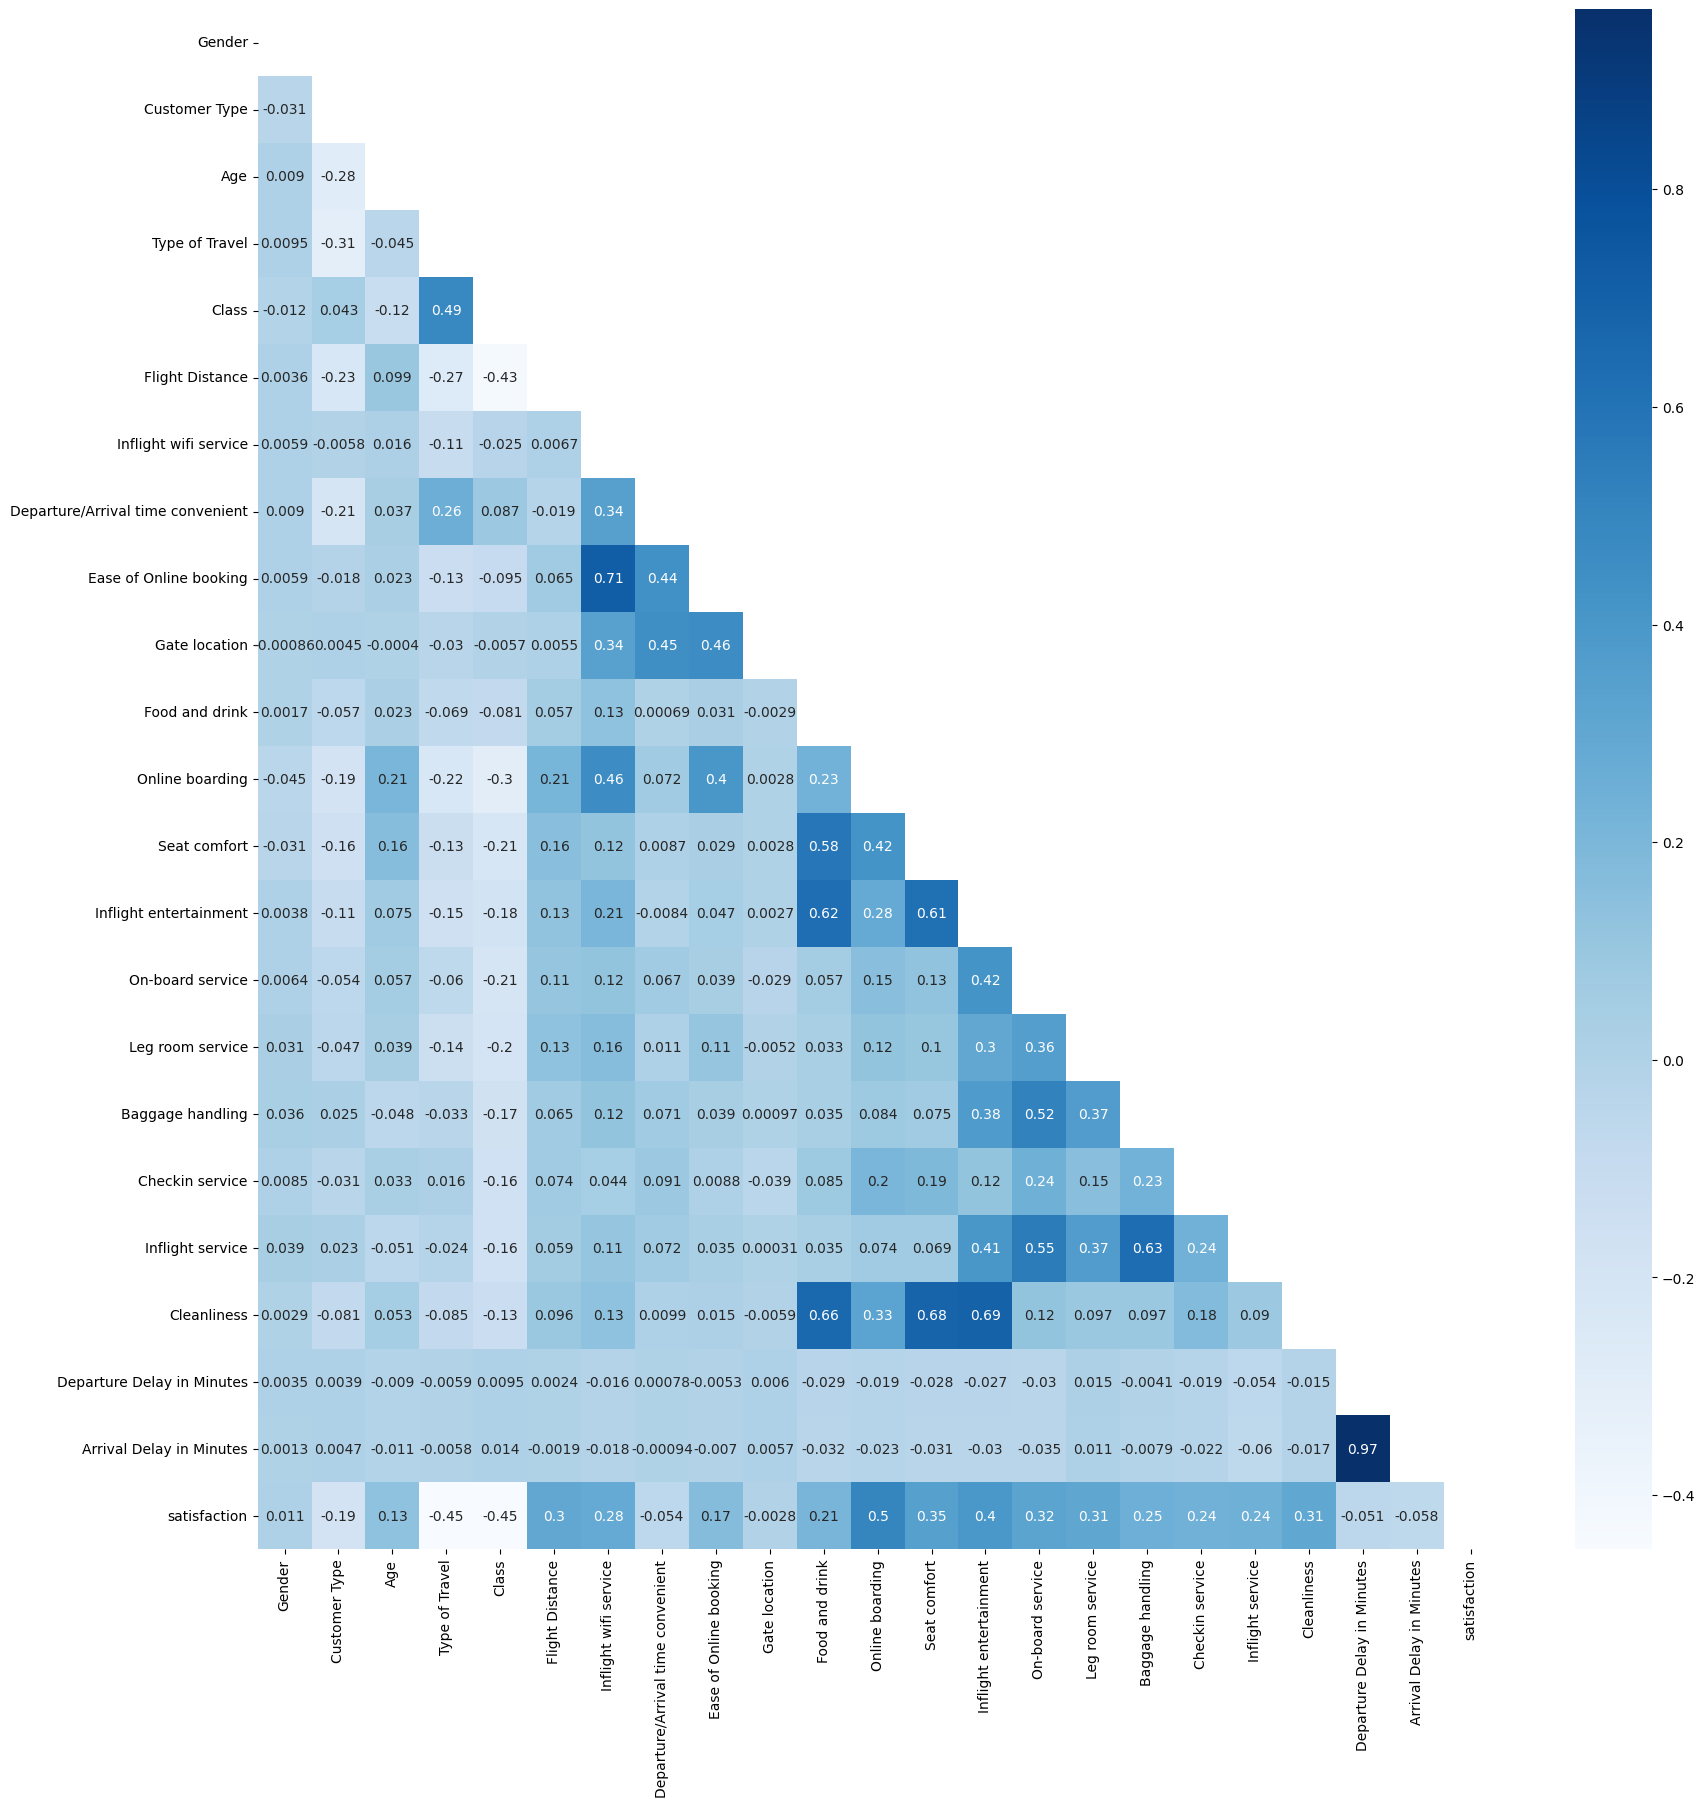

In [ ]:
# Correlation matrix
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="Blues")
plt.show()

In [ ]:
# Remove features with correlation below 0.1 or above -0.1

# Get the correlation with the target variable
correlations = df.corr()['satisfaction']

# Filter out columns with low correlation
columns_to_remove = correlations[correlations.between(-0.1, 0.1)].index

# Drop the selected columns
df = df.drop(columns=columns_to_remove, axis=1)

df.isnull().sum()

Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Leg room service          0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

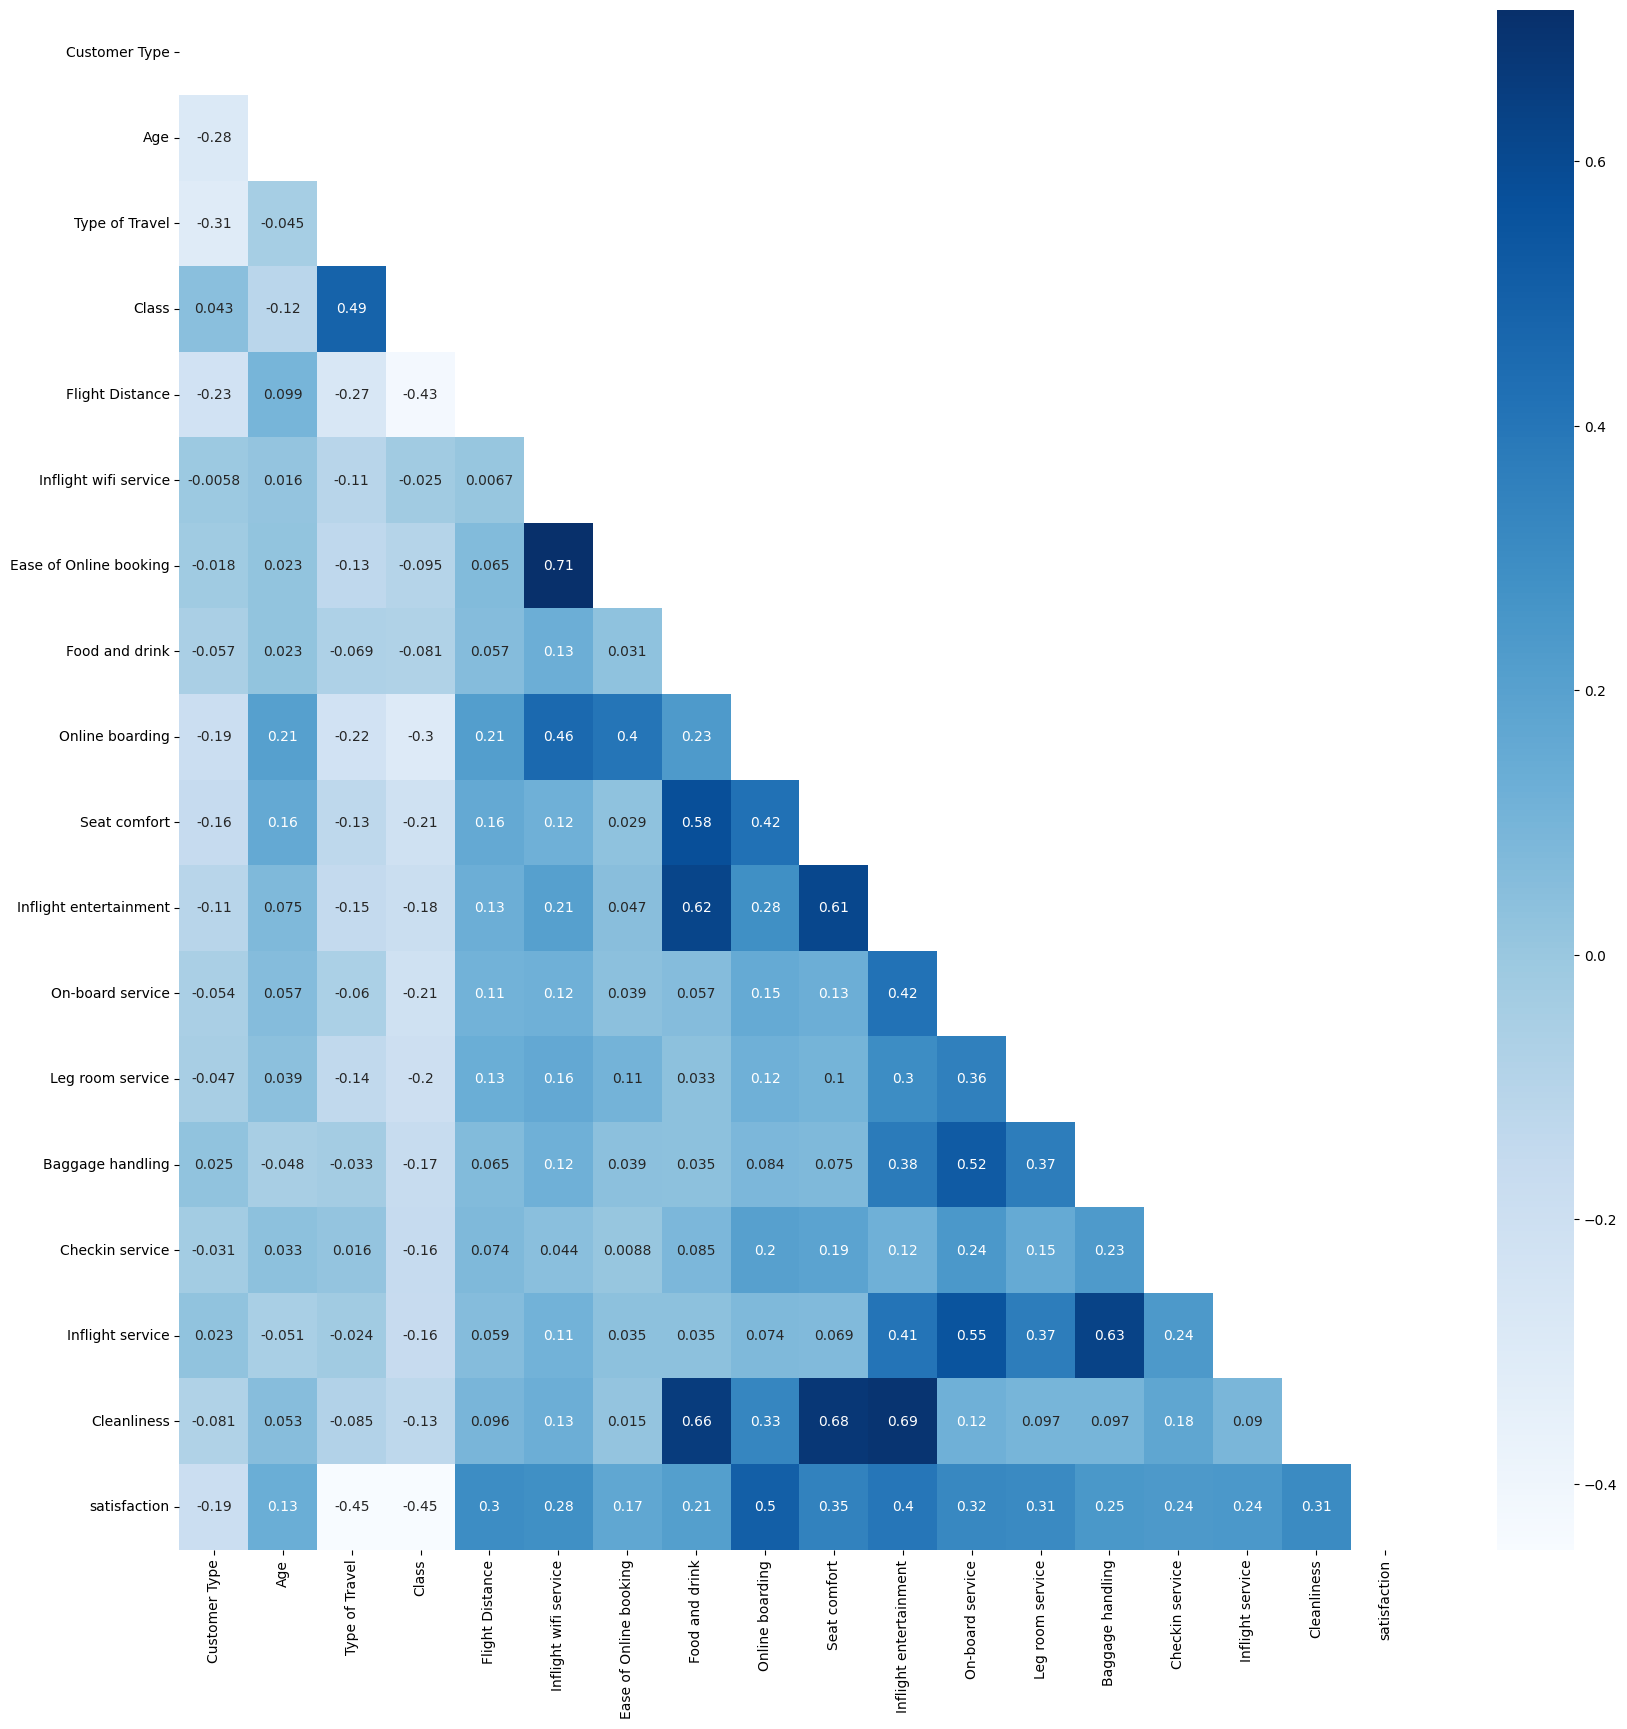

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))


plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="Blues")
plt.show()

In [ ]:
# Features and target variable
df_features = df.drop(['satisfaction'], axis=1)


# MinMaxScaler normalizes the data to a range between 0 and 1
scaler = MinMaxScaler()
features_normal = scaler.fit_transform(df_features)

# StandardScaler standardizes features
scaler = StandardScaler()
features_std = scaler.fit_transform(df_features)


df_features_normal = pd.DataFrame(features_normal, columns=df_features.columns)
df_features_std = pd.DataFrame(features_std, columns=df_features.columns)
df_features_normal.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.576923,0.0,0.5,0.026050,1.0,0.6,0.6,0.8,0.6,1.0,1.0,1.0,1.00,0.4,1.0,1.0
1,0.0,0.371795,0.0,0.0,0.571890,0.2,0.6,1.0,0.8,1.0,0.8,0.8,0.8,0.75,0.6,0.8,1.0
2,1.0,0.166667,0.0,0.5,0.032512,0.4,0.4,0.4,0.4,0.4,0.4,0.8,0.2,0.50,0.4,0.4,0.4
3,0.0,0.474359,0.0,0.0,0.675687,0.0,0.0,0.6,0.8,0.8,0.2,0.2,0.2,0.00,0.6,0.2,0.8
4,0.0,0.538462,0.0,0.5,0.232431,0.4,0.8,0.8,0.2,0.4,0.4,0.4,0.4,0.25,0.8,0.4,0.8


In [ ]:
# Training classical models
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Plotting ROC curve
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'ROC_AUC = {roc_auc}')

    # Classification report
    print(classification_report(y_test, y_pred, digits=5))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    return model, roc_auc

# Classic models

## Adaboost

In [14]:
def run_adaboost(df_features):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
    model_adaboost = AdaBoostClassifier()
    model_adaboost, roc_auc_adaboost = run_model(model_adaboost, X_train, y_train, X_test, y_test)


### Original data (Raw)

c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.920738055509277
              precision    recall  f1-score   support

           0    0.92477   0.94190   0.93326     14734
           1    0.92196   0.89957   0.91063     11242

    accuracy                        0.92358     25976
   macro avg    0.92337   0.92074   0.92194     25976
weighted avg    0.92355   0.92358   0.92346     25976



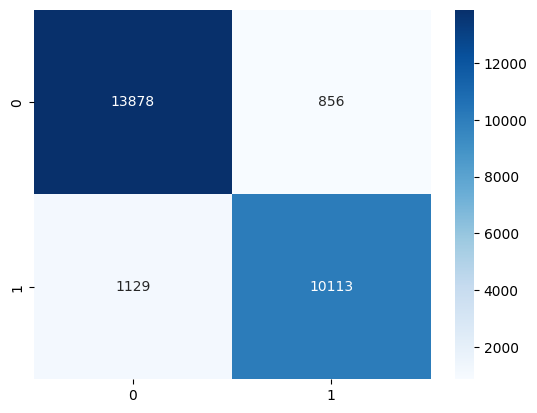

In [15]:
run_adaboost(df_features)

### Standardized data

c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.920738055509277
              precision    recall  f1-score   support

           0    0.92477   0.94190   0.93326     14734
           1    0.92196   0.89957   0.91063     11242

    accuracy                        0.92358     25976
   macro avg    0.92337   0.92074   0.92194     25976
weighted avg    0.92355   0.92358   0.92346     25976



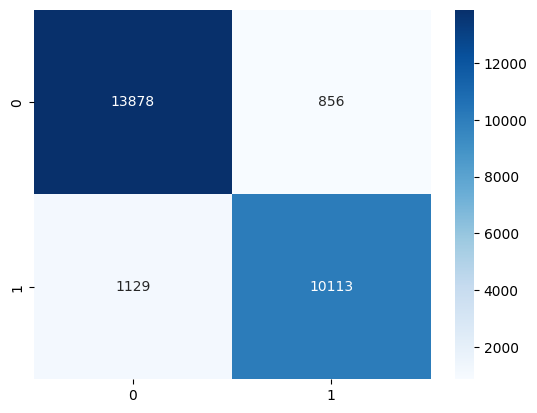

In [16]:
run_adaboost(df_features_std)

### Normalization data

c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.920738055509277
              precision    recall  f1-score   support

           0    0.92477   0.94190   0.93326     14734
           1    0.92196   0.89957   0.91063     11242

    accuracy                        0.92358     25976
   macro avg    0.92337   0.92074   0.92194     25976
weighted avg    0.92355   0.92358   0.92346     25976



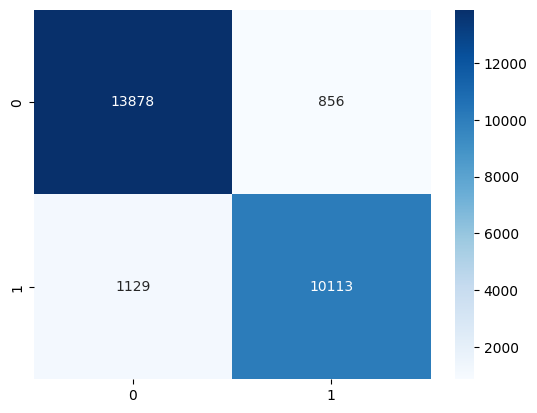

In [17]:
run_adaboost(df_features_normal)

### Model optimization

In [13]:
def optimize_adaboost(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0],
        'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
    }

    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best ROC AUC Score:", grid_search.best_score_)

    return grid_search.best_estimator_

def run_adaboost_optimize(df_features, optimized_model):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
    model_adaboost, roc_auc_adaboost = run_model(optimized_model, X_train, y_train, X_test, y_test)


#### Original data

c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Best ROC AUC Score: 0.9932179180147702


c:\Users\F15\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.9553325548400773
              precision    recall  f1-score   support

           0    0.95386   0.97231   0.96300     14734
           1    0.96276   0.93836   0.95040     11242

    accuracy                        0.95761     25976
   macro avg    0.95831   0.95533   0.95670     25976
weighted avg    0.95771   0.95761   0.95755     25976



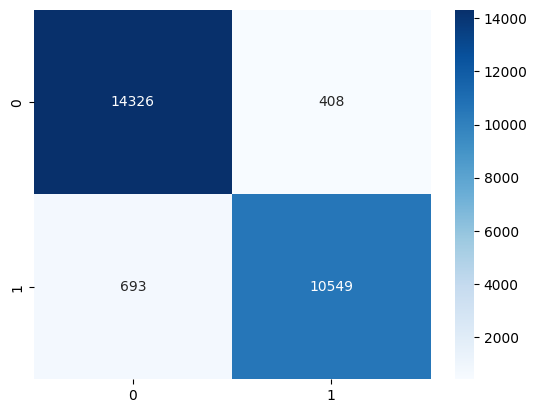

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_adaboost(X_train, y_train)
run_adaboost_optimize(df_features, optimized_model)

#### Standardized data

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Best ROC AUC Score: 0.9932181498048166


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.9553770309119507
              precision    recall  f1-score   support

           0    0.95392   0.97231   0.96303     14734
           1    0.96277   0.93845   0.95045     11242

    accuracy                        0.95765     25976
   macro avg    0.95834   0.95538   0.95674     25976
weighted avg    0.95775   0.95765   0.95758     25976



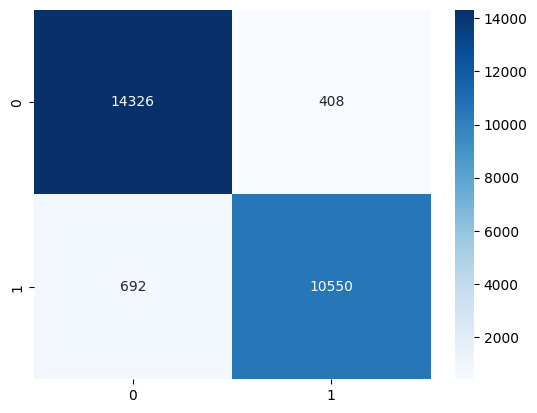

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features_std, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_adaboost(X_train, y_train)
run_adaboost_optimize(df_features_std, optimized_model)

#### Normalization data

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200}
Best ROC AUC Score: 0.9932242164549585


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC_AUC = 0.9553325548400773
              precision    recall  f1-score   support

           0    0.95386   0.97231   0.96300     14734
           1    0.96276   0.93836   0.95040     11242

    accuracy                        0.95761     25976
   macro avg    0.95831   0.95533   0.95670     25976
weighted avg    0.95771   0.95761   0.95755     25976



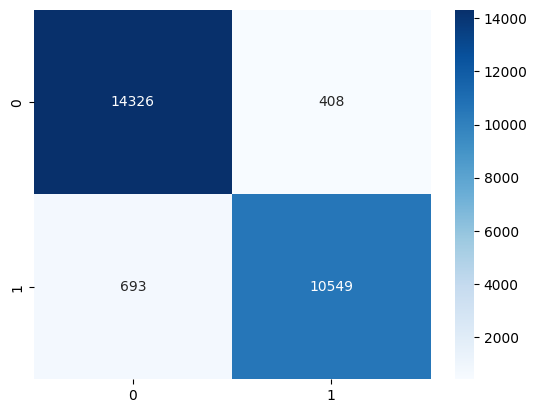

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features_normal, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_adaboost(X_train, y_train)
run_adaboost_optimize(df_features_normal, optimized_model)

## Bootstrap

In [15]:
def run_bootstrap(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  model_bootstrap = BaggingClassifier() # Initialize a BaggingClassifier
  model_bootstrap, roc_auc_bootstrap = run_model(model_bootstrap, X_train, y_train, X_test, y_test)

#### Original data

ROC_AUC = 0.9552407470994804
              precision    recall  f1-score   support

           0    0.95049   0.97720   0.96366     14734
           1    0.96897   0.93329   0.95079     11242

    accuracy                        0.95819     25976
   macro avg    0.95973   0.95524   0.95722     25976
weighted avg    0.95849   0.95819   0.95809     25976



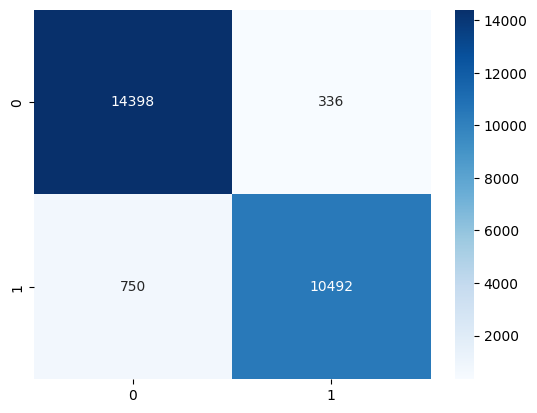

In [ ]:
run_bootstrap(df_features)

#### Standardized data

ROC_AUC = 0.9551224843369003
              precision    recall  f1-score   support

           0    0.95001   0.97767   0.96364     14734
           1    0.96957   0.93257   0.95071     11242

    accuracy                        0.95815     25976
   macro avg    0.95979   0.95512   0.95718     25976
weighted avg    0.95848   0.95815   0.95805     25976



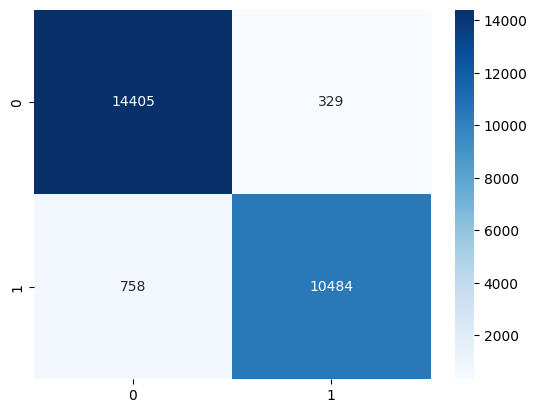

In [ ]:
run_bootstrap(df_features_std)

#### Normalization data

ROC_AUC = 0.9557942499122252
              precision    recall  f1-score   support

           0    0.95060   0.97821   0.96421     14734
           1    0.97032   0.93337   0.95149     11242

    accuracy                        0.95881     25976
   macro avg    0.96046   0.95579   0.95785     25976
weighted avg    0.95913   0.95881   0.95870     25976



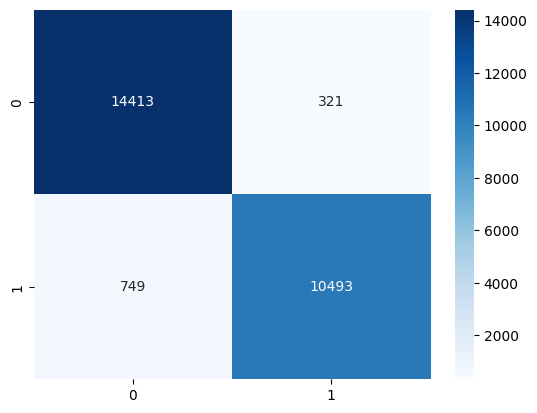

In [ ]:
run_bootstrap(df_features_normal)

### Model optimization

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

def optimize_bootstrap(X_train, y_train):
    param_grid = {
        'n_estimators': [10, 50, 100],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }

    grid_search = GridSearchCV(BaggingClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best ROC AUC Score:", grid_search.best_score_)

    return grid_search.best_estimator_

def run_bootstrap_optimize(df_features, optimized_model):
    X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
    model_bootstrap, roc_auc_bootstrap = run_model(optimized_model, X_train, y_train, X_test, y_test)

#### Original data

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 100}
Best ROC AUC Score: 0.9927327266311545
ROC_AUC = 0.9582579115669108
              precision    recall  f1-score   support

           0    0.95359   0.97896   0.96611     14734
           1    0.97143   0.93756   0.95419     11242

    accuracy                        0.96104     25976
   macro avg    0.96251   0.95826   0.96015     25976
weighted avg    0.96131   0.96104   0.96095     25976



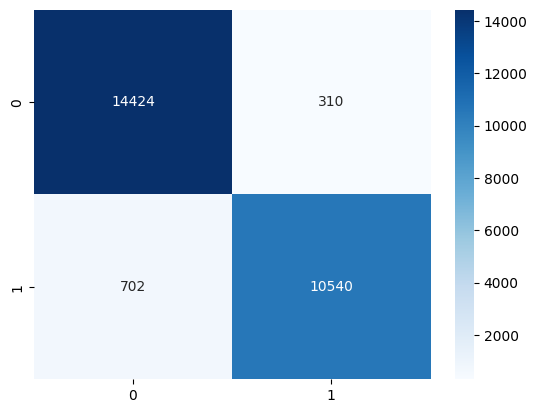

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_bootstrap(X_train, y_train)
run_bootstrap_optimize(df_features, optimized_model)

#### Standardized data

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 100}
Best ROC AUC Score: 0.9926312059193224
ROC_AUC = 0.958168959423164
              precision    recall  f1-score   support

           0    0.95346   0.97896   0.96604     14734
           1    0.97142   0.93738   0.95410     11242

    accuracy                        0.96096     25976
   macro avg    0.96244   0.95817   0.96007     25976
weighted avg    0.96124   0.96096   0.96087     25976



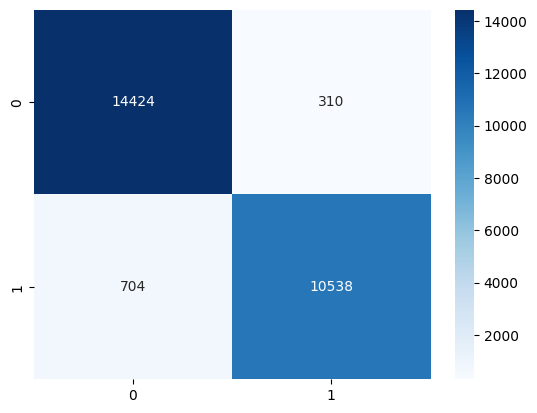

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_features_std, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_bootstrap(X_train, y_train)
run_bootstrap_optimize(df_features_std, optimized_model)

#### Normalization data

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'n_estimators': 100}
Best ROC AUC Score: 0.9927672323209109
ROC_AUC = 0.9572725012398603
              precision    recall  f1-score   support

           0    0.95273   0.97815   0.96527     14734
           1    0.97032   0.93640   0.95306     11242

    accuracy                        0.96008     25976
   macro avg    0.96153   0.95727   0.95917     25976
weighted avg    0.96034   0.96008   0.95999     25976



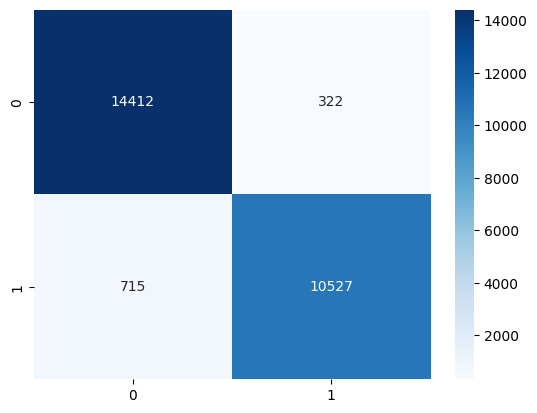

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_features_normal, df['satisfaction'], test_size=0.2, random_state=42)  # Choose appropriate data here
optimized_model = optimize_bootstrap(X_train, y_train)
run_bootstrap_optimize(df_features_normal, optimized_model)

# Neural networks

## functions

In [13]:
def model_eval(model, history, X_test, y_test):
  history_epoch_count = len(history.history['loss'])
  pd.DataFrame(history.history).plot(figsize=(8,5), xlim = [0,history_epoch_count], ylim = [0,1], grid = True, xlabel = "Epoka", style = ["r--", "r--.", "b-", "b-*"])
  plt.show()

  print("Ocena modelu:")
  model.evaluate(X_test.values, y_test.values)
  print("Prognoza modelu")
  y_proba = model.predict(X_test.values)
  y_pred = (y_proba > 0.5).astype(int)
  print(classification_report(y_test.values, y_pred, zero_division=1))
  ConfusionMatrixDisplay.from_predictions(y_test.values, y_pred)
  plt.show()

## Base model - sgd

In [15]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - accuracy: 0.5599 - loss: 552366.6250 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 836us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 832us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 826us/step - accuracy: 0.5663 - loss: 0.6844 - val_accuracy: 0.5672 - val_loss: 0.6841
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step - accuracy: 0.5

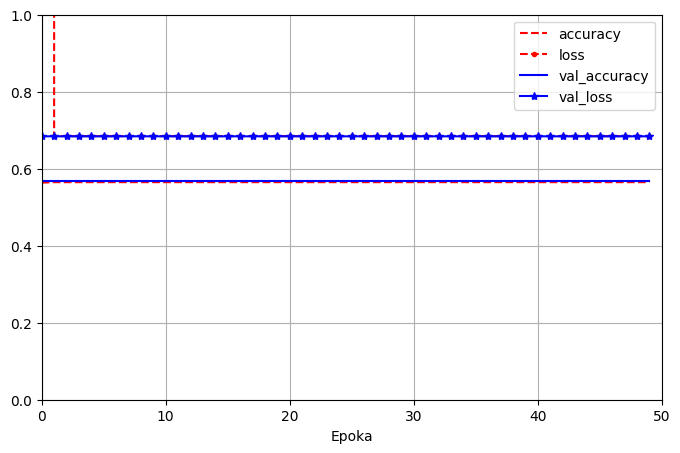

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.5647 - loss: 0.6848
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     14734
           1       1.00      0.00      0.00     11242

    accuracy                           0.57     25976
   macro avg       0.78      0.50      0.36     25976
weighted avg       0.75      0.57      0.41     25976



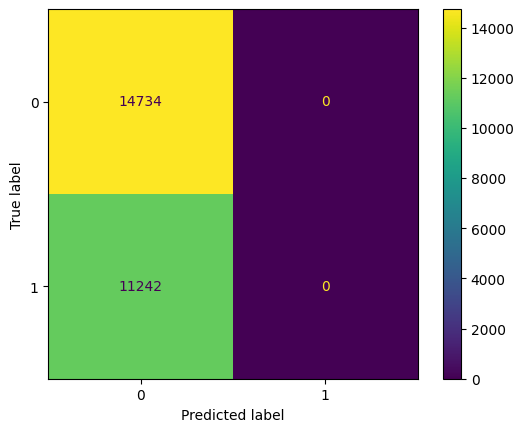

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8531 - loss: 0.3657 - val_accuracy: 0.9209 - val_loss: 0.2011
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9247 - loss: 0.1915 - val_accuracy: 0.9317 - val_loss: 0.1698
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9342 - loss: 0.1655 - val_accuracy: 0.9380 - val_loss: 0.1564
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9392 - loss: 0.1529 - val_accuracy: 0.9409 - val_loss: 0.1480
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 971us/step - accuracy: 0.9421 - loss: 0.1445 - val_accuracy: 0.9443 - val_loss: 0.1415
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9448 - loss: 0.1378 - val_accuracy: 0.9462 - val_loss: 0.1365
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 947us/step - accuracy: 0.9468 - loss: 0.1323 - val_accuracy: 0.9476 - val_loss: 0.1324
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9486 - loss: 0.127

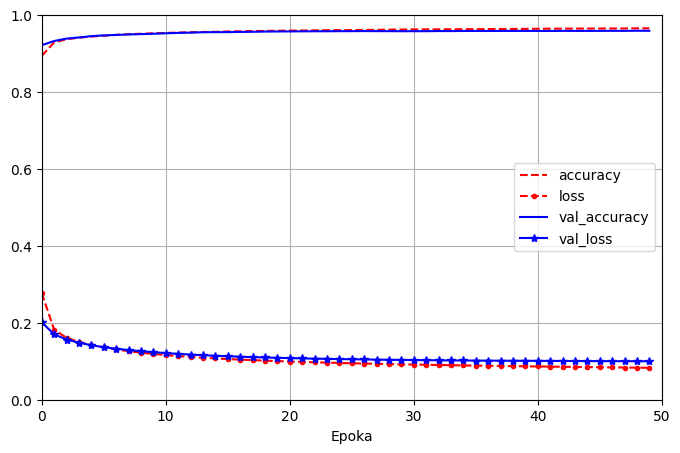

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9578 - loss: 0.1026
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



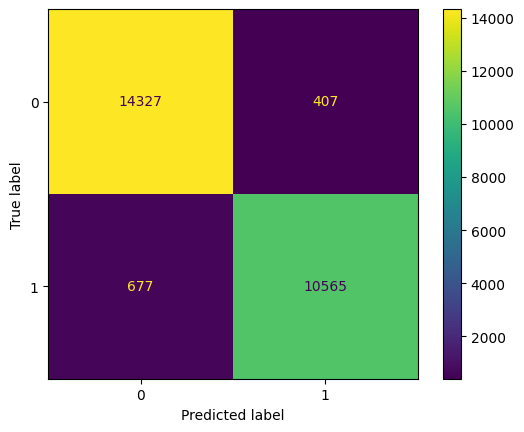

In [16]:
run_model(df_features_std)

### Normalization data

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step - accuracy: 0.8108 - loss: 0.4643 - val_accuracy: 0.8770 - val_loss: 0.3151
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 860us/step - accuracy: 0.8824 - loss: 0.3000 - val_accuracy: 0.9048 - val_loss: 0.2503
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step - accuracy: 0.9094 - loss: 0.2362 - val_accuracy: 0.9194 - val_loss: 0.2044
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 848us/step - accuracy: 0.9210 - loss: 0.1991 - val_accuracy: 0.9269 - val_loss: 0.1827
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 844us/step - accuracy: 0.9274 - loss: 0.1803 - val_accuracy: 0.9321 - val_loss: 0.1692
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step - accuracy: 0.9315 - loss: 0.1681 - val_accuracy: 0.9360 - val_loss: 0.1595
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 876us/step - accuracy: 0.9353 - loss: 0.1594 - val_accuracy: 0.9392 - val_loss: 0.1522
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 864us/step - accuracy: 0.9382 -

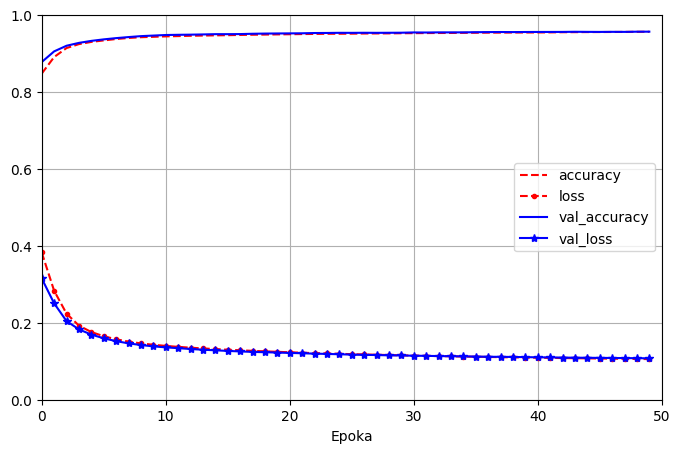

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.9547 - loss: 0.1092
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



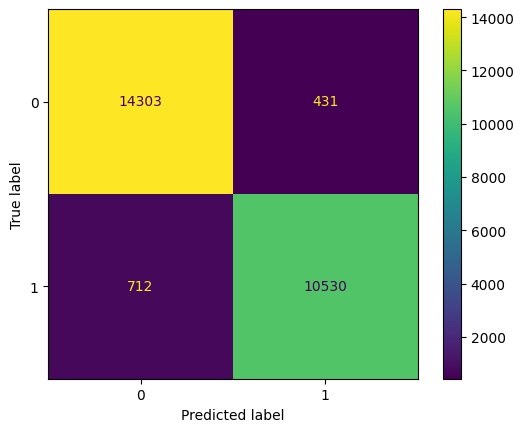

In [ ]:
run_model(df_features_normal)

## Base model - adam

In [29]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6410 - loss: 4.0212 - val_accuracy: 0.8597 - val_loss: 0.3720
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8067 - loss: 0.6025 - val_accuracy: 0.8739 - val_loss: 0.3325
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8495 - loss: 0.3891 - val_accuracy: 0.8842 - val_loss: 0.2831
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8713 - loss: 0.3115 - val_accuracy: 0.9026 - val_loss: 0.2487
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8953 - loss: 0.2521 - val_accuracy: 0.9107 - val_loss: 0.2305
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9049 - loss: 0.2305 - val_accuracy: 0.9098 - val_loss: 0.2215
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9112 - loss: 0.2136 - val_accuracy: 0.8933 - val_loss: 0.2615
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9158 - loss: 0

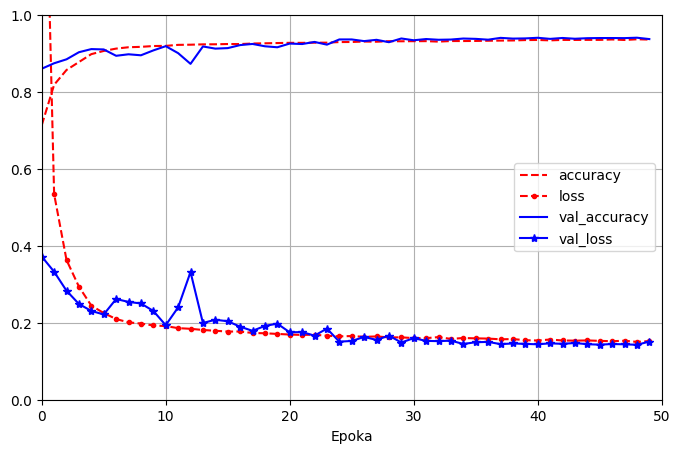

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9305 - loss: 0.1576
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14734
           1       0.94      0.91      0.93     11242

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



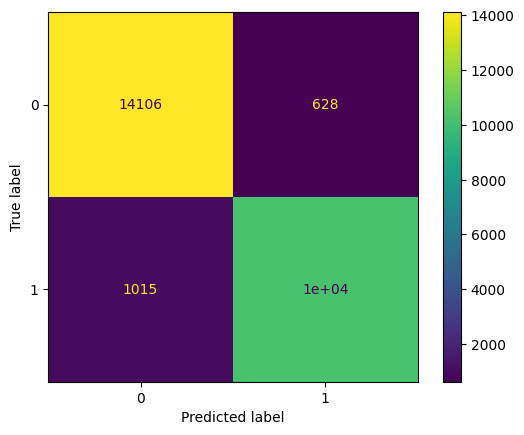

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9229 - loss: 0.1911 - val_accuracy: 0.9535 - val_loss: 0.1175
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9528 - loss: 0.1135 - val_accuracy: 0.9584 - val_loss: 0.1039
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9574 - loss: 0.1011 - val_accuracy: 0.9598 - val_loss: 0.0976
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9598 - loss: 0.0942 - val_accuracy: 0.9612 - val_loss: 0.0942
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9618 - loss: 0.0905 - val_accuracy: 0.9613 - val_loss: 0.0931
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9630 - loss: 0.0877 - val_accuracy: 0.9615 - val_loss: 0.0931
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9638 - loss: 0.0849 - val_accuracy: 0.9622 - val_loss: 0.0923
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9648 - loss: 0.0829 - 

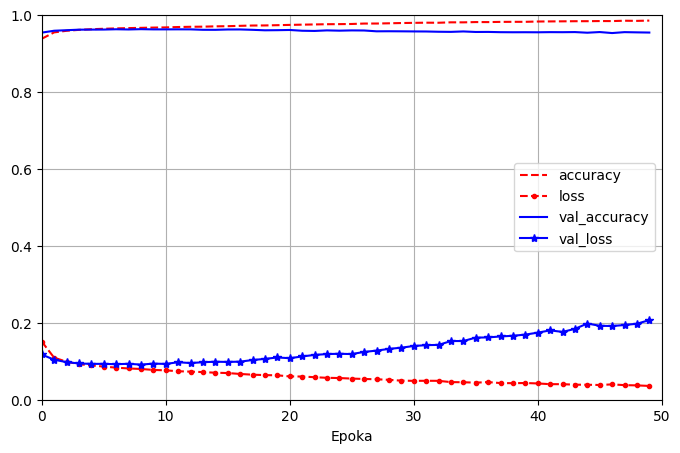

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9525 - loss: 0.2090
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14734
           1       0.95      0.94      0.95     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



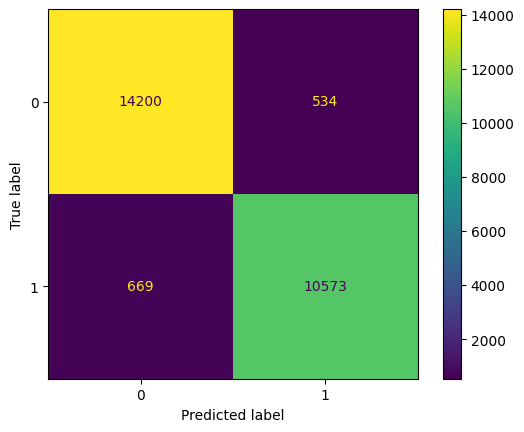

In [30]:
run_model(df_features_std)

### Normalization data

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8980 - loss: 0.2440 - val_accuracy: 0.9480 - val_loss: 0.1341
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9424 - loss: 0.1384 - val_accuracy: 0.9505 - val_loss: 0.1226
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9481 - loss: 0.1257 - val_accuracy: 0.9527 - val_loss: 0.1184
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9502 - loss: 0.1179 - val_accuracy: 0.9520 - val_loss: 0.1200
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9528 - loss: 0.1126 - val_accuracy: 0.9538 - val_loss: 0.1159
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9547 - loss: 0.1081 - val_accuracy: 0.9563 - val_loss: 0.1070
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9558 - loss: 0.1045 - val_accuracy: 0.9586 - val_loss: 0.1013
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9571 - loss: 0

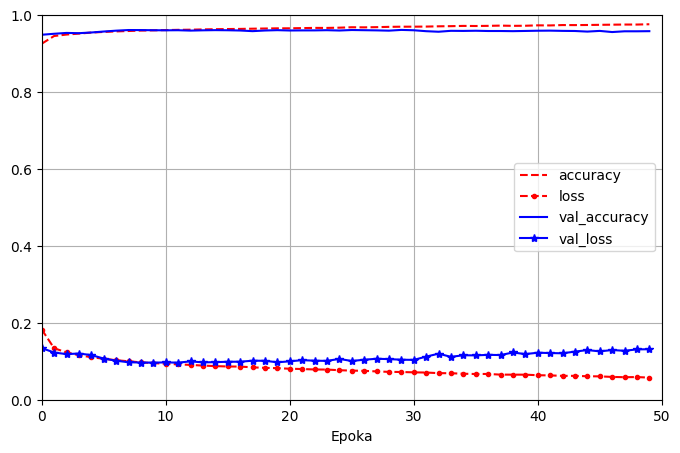

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1290
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



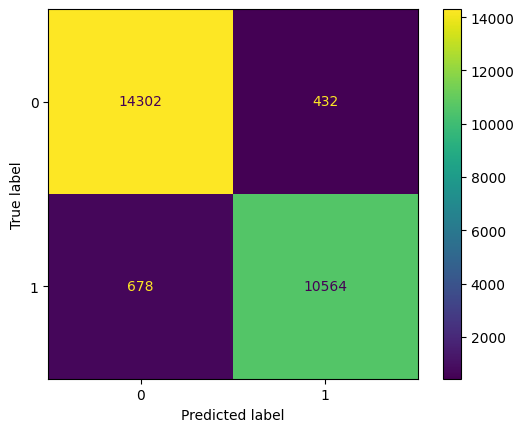

In [ ]:
run_model(df_features_normal)

## Base model - rmsprop

In [31]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6114 - loss: 6.2460 - val_accuracy: 0.8536 - val_loss: 0.3676
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8277 - loss: 0.3998 - val_accuracy: 0.8482 - val_loss: 0.3533
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8626 - loss: 0.3240 - val_accuracy: 0.8876 - val_loss: 0.2662
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8780 - loss: 0.2916 - val_accuracy: 0.9028 - val_loss: 0.2506
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8865 - loss: 0.2732 - val_accuracy: 0.9194 - val_loss: 0.2074
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8930 - loss: 0.2591 - val_accuracy: 0.8703 - val_loss: 0.3958
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8975 - loss: 0.2508 - val_accuracy: 0.9096 - val_loss: 0.2087
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9027 - loss: 0

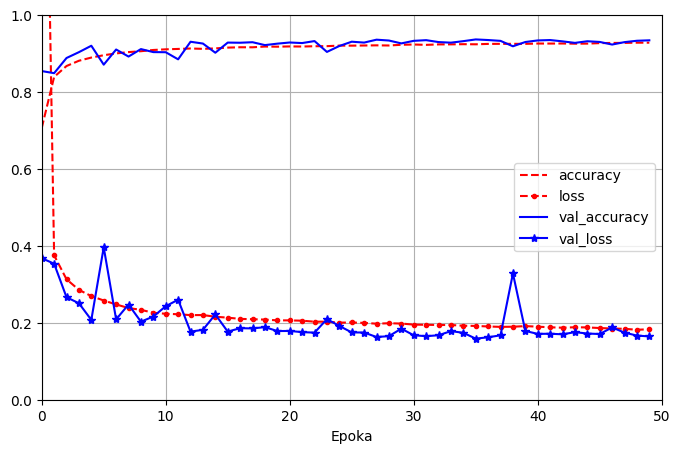

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9315 - loss: 0.1679
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14734
           1       0.92      0.93      0.92     11242

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



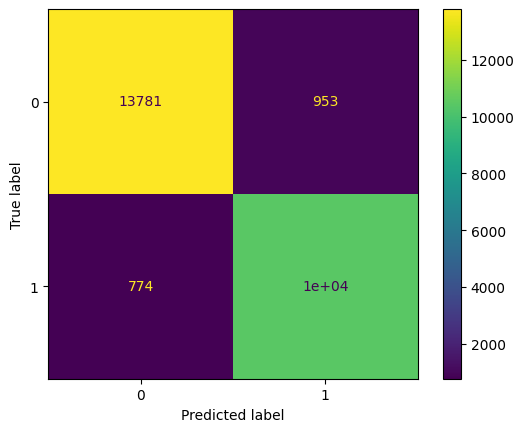

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9214 - loss: 0.1948 - val_accuracy: 0.9485 - val_loss: 0.1208
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9504 - loss: 0.1195 - val_accuracy: 0.9560 - val_loss: 0.1075
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9551 - loss: 0.1094 - val_accuracy: 0.9584 - val_loss: 0.1052
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9571 - loss: 0.1047 - val_accuracy: 0.9592 - val_loss: 0.1024
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9595 - loss: 0.1019 - val_accuracy: 0.9588 - val_loss: 0.1046
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9595 - loss: 0.0996 - val_accuracy: 0.9590 - val_loss: 0.1044
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9606 - loss: 0.0980 - val_accuracy: 0.9593 - val_loss: 0.1055
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9607 - loss: 0

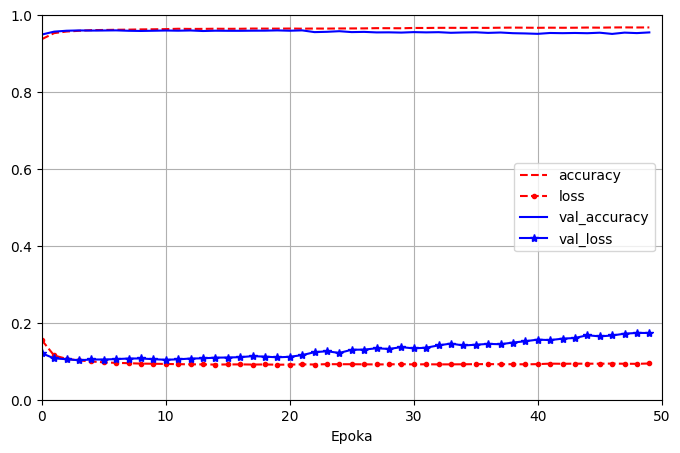

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1725
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14734
           1       0.95      0.95      0.95     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



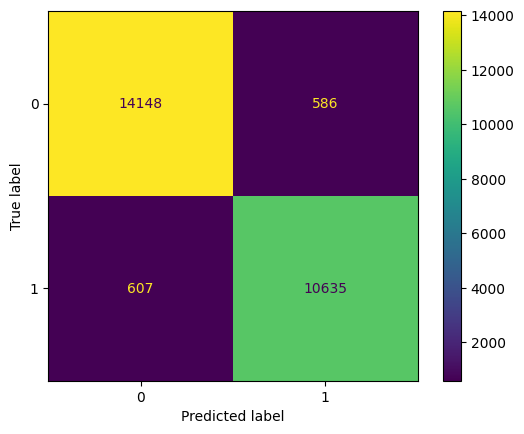

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8946 - loss: 0.2544 - val_accuracy: 0.9448 - val_loss: 0.1349
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9403 - loss: 0.1418 - val_accuracy: 0.9486 - val_loss: 0.1244
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9455 - loss: 0.1306 - val_accuracy: 0.9496 - val_loss: 0.1263
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9489 - loss: 0.1244 - val_accuracy: 0.9516 - val_loss: 0.1200
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9509 - loss: 0.1217 - val_accuracy: 0.9478 - val_loss: 0.1391
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9516 - loss: 0.1196 - val_accuracy: 0.9488 - val_loss: 0.1379
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9519 - loss: 0.1196 - val_accuracy: 0.9488 - val_loss: 0.1325
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9526 - loss: 0

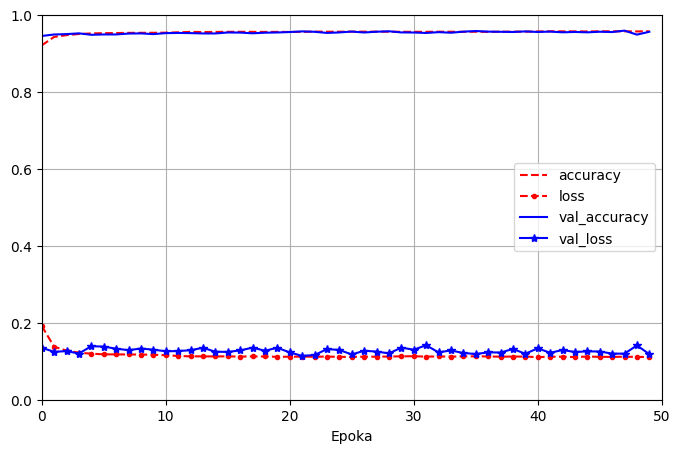

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9538 - loss: 0.1200
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



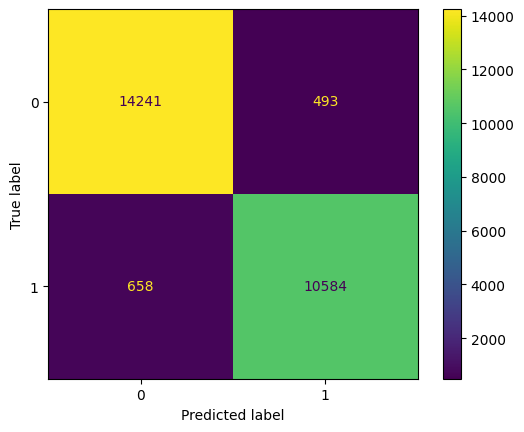

In [ ]:
run_model(df_features_normal)

## Model - rmsprop different number of neurons

In [32]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,617 (436.00 KB)

 Trainable params: 111,617 (436.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5938 - loss: 1.5675 - val_accuracy: 0.8611 - val_loss: 0.4136
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8065 - loss: 0.4446 - val_accuracy: 0.8739 - val_loss: 0.3126
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8569 - loss: 0.3405 - val_accuracy: 0.8725 - val_loss: 0.2990
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8749 - loss: 0.2979 - val_accuracy: 0.8921 - val_loss: 0.2546
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8849 - loss: 0.2788 - val_accuracy: 0.8696 - val_loss: 0.3736
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8943 - loss: 0.2646 - val_accuracy: 0.8398 - val_loss: 0.6365
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8967 - loss: 0.2560 - val_accuracy: 0.8373 - val_loss: 0.7573
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8998 - loss: 0.2498 - 

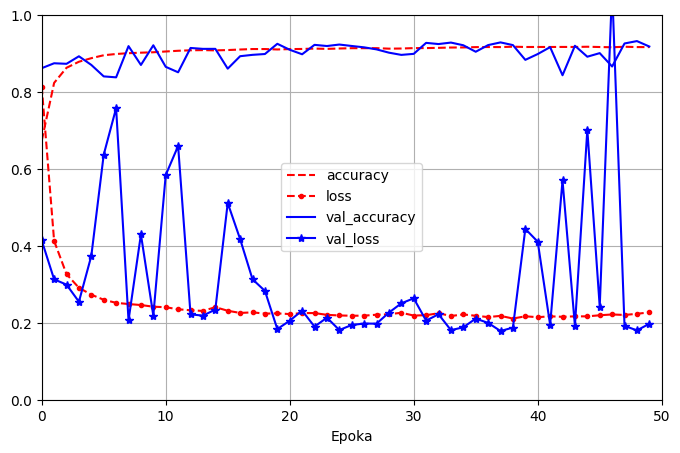

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9163 - loss: 0.2019
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.92     14734
           1       0.87      0.95      0.91     11242

    accuracy                           0.92     25976
   macro avg       0.91      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



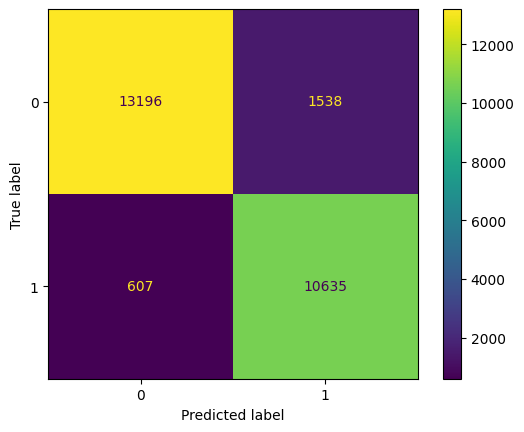

In [33]:
run_model(df_features)

### Standardized data

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,617 (436.00 KB)

 Trainable params: 111,617 (436.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9239 - loss: 0.1886 - val_accuracy: 0.9553 - val_loss: 0.1111
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9530 - loss: 0.1158 - val_accuracy: 0.9588 - val_loss: 0.1019
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9562 - loss: 0.1071 - val_accuracy: 0.9602 - val_loss: 0.0973
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9583 - loss: 0.1029 - val_accuracy: 0.9612 - val_loss: 0.0992
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9594 - loss: 0.1010 - val_accuracy: 0.9611 - val_loss: 0.1023
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9603 - loss: 0.0992 - val_accuracy: 0.9604 - val_loss: 0.1043
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9600 - loss: 0.0999 - val_accuracy: 0.9604 - val_loss: 0.1072
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9608 - loss: 0.0998 - 

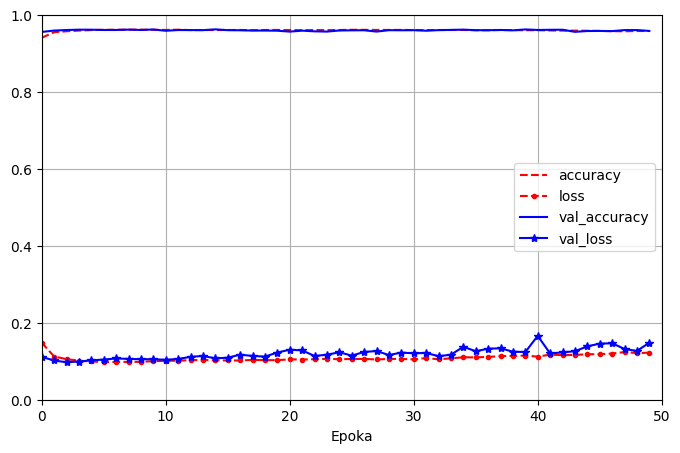

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.9568 - loss: 0.1485
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     14734
           1       0.99      0.91      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



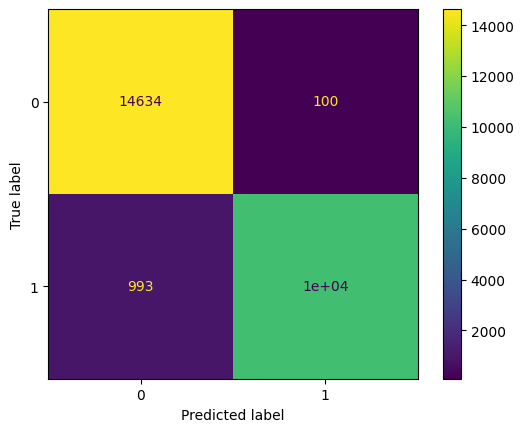

In [34]:
run_model(df_features_std)

### Normalization data

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,617 (436.00 KB)

 Trainable params: 111,617 (436.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8969 - loss: 0.2414 - val_accuracy: 0.9456 - val_loss: 0.1338
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9429 - loss: 0.1382 - val_accuracy: 0.9491 - val_loss: 0.1330
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9482 - loss: 0.1285 - val_accuracy: 0.9536 - val_loss: 0.1159
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9490 - loss: 0.1253 - val_accuracy: 0.9515 - val_loss: 0.1227
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9516 - loss: 0.1226 - val_accuracy: 0.9531 - val_loss: 0.1180
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9516 - loss: 0.1244 - val_accuracy: 0.9548 - val_loss: 0.1172
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9521 - loss: 0.1244 - val_accuracy: 0.9514 - val_loss: 0.1258
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9511 - loss: 0.1266 - 

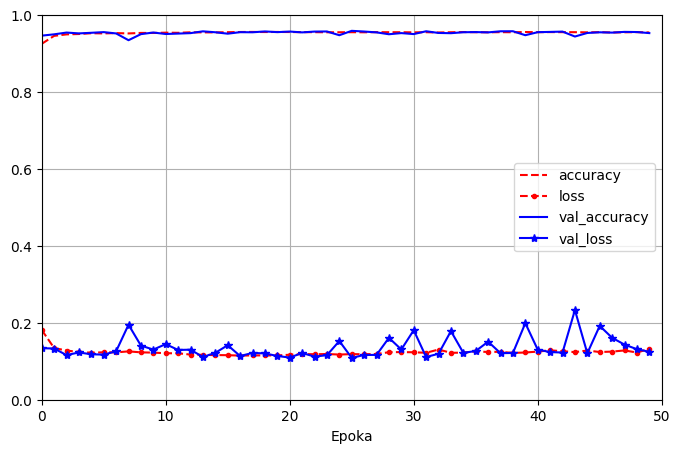

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.9502 - loss: 0.1252
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14734
           1       0.98      0.91      0.94     11242

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



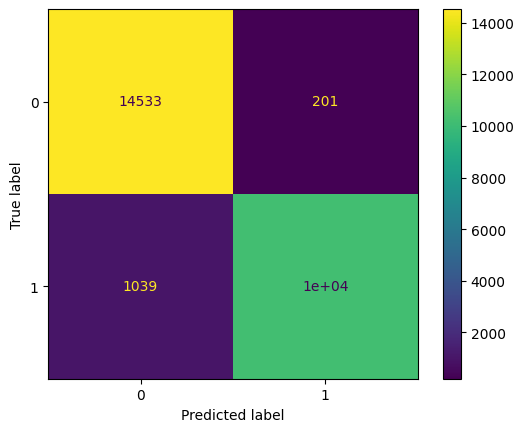

In [35]:
run_model(df_features_normal)

## Model  - adam, 4 layers x64

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6699 - loss: 0.8602 - val_accuracy: 0.8553 - val_loss: 0.3646
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8377 - loss: 0.3968 - val_accuracy: 0.8526 - val_loss: 0.3608
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8524 - loss: 0.3580 - val_accuracy: 0.8787 - val_loss: 0.2952
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8699 - loss: 0.3109 - val_accuracy: 0.8922 - val_loss: 0.2659
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8874 - loss: 0.2718 - val_accuracy: 0.9103 - val_loss: 0.2257
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9027 - loss: 0.2349 - val_accuracy: 0.9188 - val_loss: 0.1949
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9048 - loss: 0.2250 - val_accuracy: 0.9101 - val_loss: 0.2103
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9113 - loss: 0.2095 

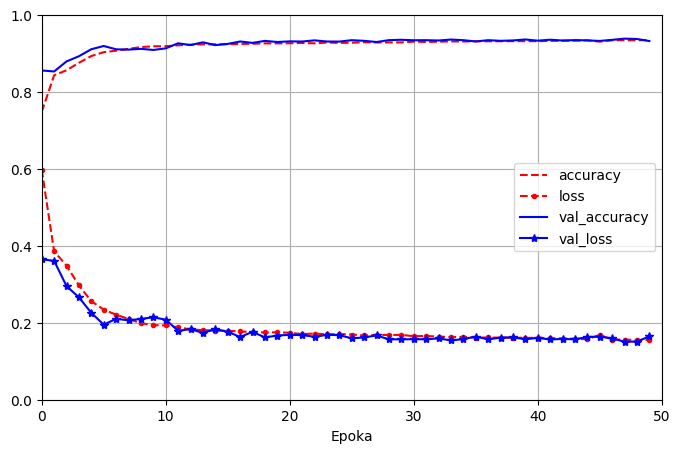

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9276 - loss: 0.1714
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14734
           1       0.92      0.92      0.92     11242

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



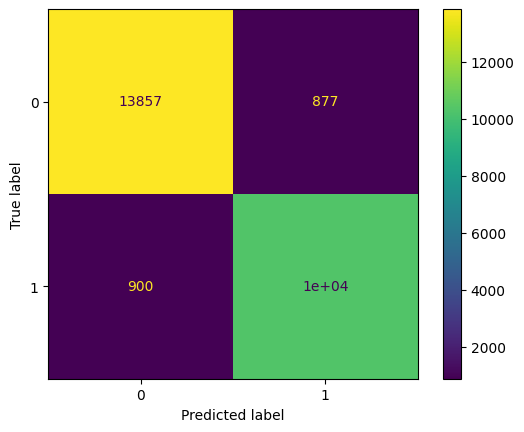

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9137 - loss: 0.2123 - val_accuracy: 0.9515 - val_loss: 0.1240
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9503 - loss: 0.1195 - val_accuracy: 0.9565 - val_loss: 0.1071
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9552 - loss: 0.1081 - val_accuracy: 0.9586 - val_loss: 0.1026
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9582 - loss: 0.1000 - val_accuracy: 0.9595 - val_loss: 0.1002
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9597 - loss: 0.0955 - val_accuracy: 0.9597 - val_loss: 0.1014
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9610 - loss: 0.0924 - val_accuracy: 0.9609 - val_loss: 0.0965
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9622 - loss: 0.0898 - val_accuracy: 0.9598 - val_loss: 0.0987
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9626 - loss: 0.088

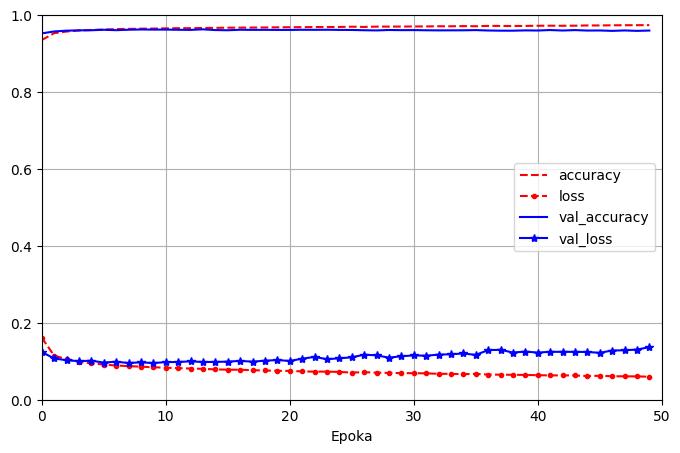

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9565 - loss: 0.1421
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



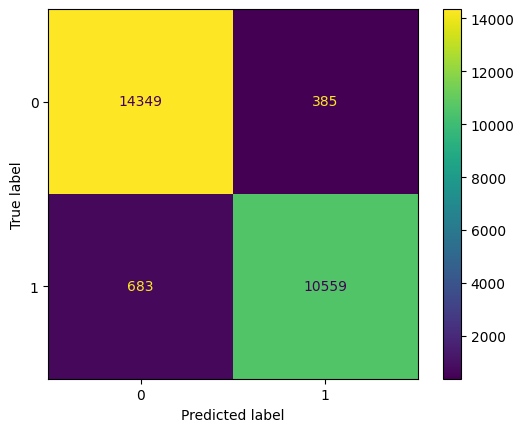

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8924 - loss: 0.2582 - val_accuracy: 0.9460 - val_loss: 0.1365
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9417 - loss: 0.1396 - val_accuracy: 0.9448 - val_loss: 0.1332
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9472 - loss: 0.1257 - val_accuracy: 0.9481 - val_loss: 0.1247
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9500 - loss: 0.1186 - val_accuracy: 0.9501 - val_loss: 0.1197
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9529 - loss: 0.1128 - val_accuracy: 0.9533 - val_loss: 0.1112
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9546 - loss: 0.1083 - val_accuracy: 0.9565 - val_loss: 0.1064
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9558 - loss: 0.1055 - val_accuracy: 0.9545 - val_loss: 0.1090
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9569 - loss: 0.103

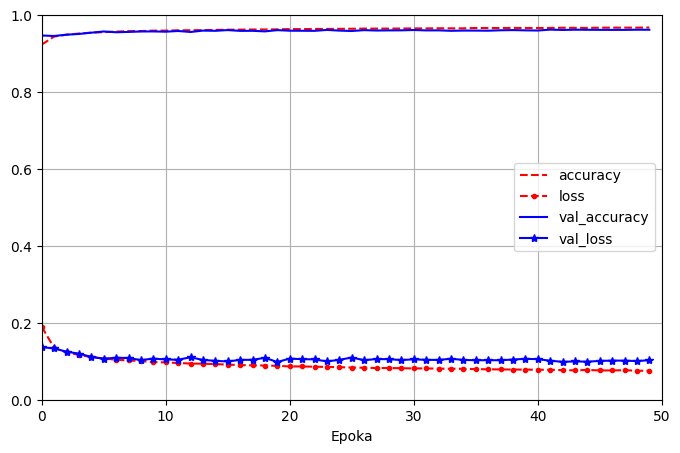

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9603 - loss: 0.1043
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14734
           1       0.97      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



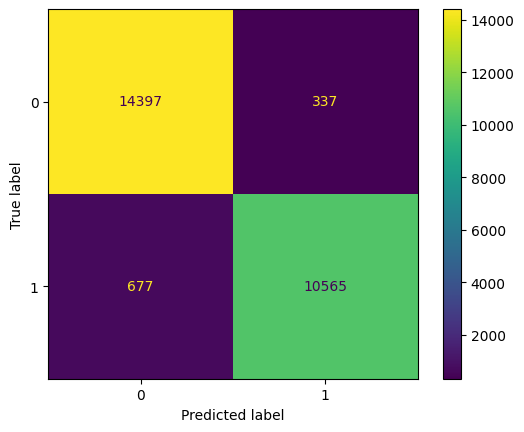

In [ ]:
run_model(df_features_normal)

## Model  - adam, different number of neurons

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6812 - loss: 1.1471 - val_accuracy: 0.8257 - val_loss: 0.4117
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8384 - loss: 0.3920 - val_accuracy: 0.8485 - val_loss: 0.3702
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8523 - loss: 0.3616 - val_accuracy: 0.8726 - val_loss: 0.3254
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8645 - loss: 0.3304 - val_accuracy: 0.9039 - val_loss: 0.2422
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8918 - loss: 0.2584 - val_accuracy: 0.9064 - val_loss: 0.2347
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9045 - loss: 0.2315 - val_accuracy: 0.9217 - val_loss: 0.1902
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9104 - loss: 0.2135 - val_accuracy: 0.9057 - val_loss: 0.2211
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9112 - loss: 0.21

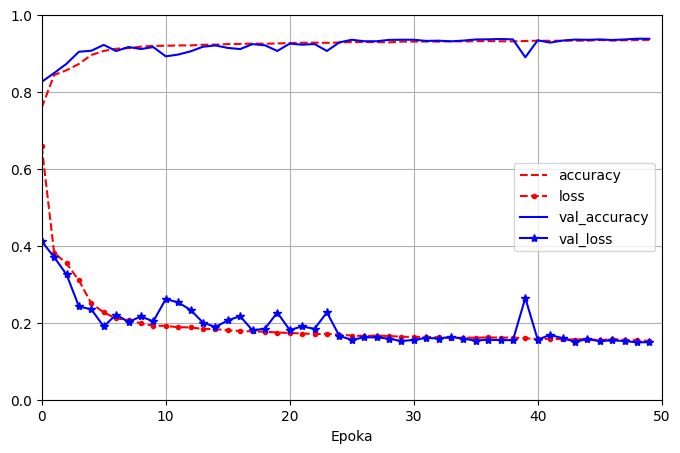

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9323 - loss: 0.1550
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14734
           1       0.95      0.91      0.93     11242

    accuracy                           0.94     25976
   macro avg       0.94      0.93      0.94     25976
weighted avg       0.94      0.94      0.94     25976



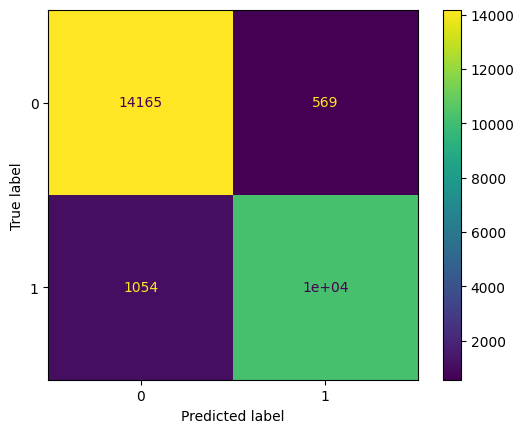

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9227 - loss: 0.1906 - val_accuracy: 0.9547 - val_loss: 0.1122
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9535 - loss: 0.1113 - val_accuracy: 0.9594 - val_loss: 0.0985
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9582 - loss: 0.0991 - val_accuracy: 0.9603 - val_loss: 0.0963
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9608 - loss: 0.0939 - val_accuracy: 0.9610 - val_loss: 0.0929
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9624 - loss: 0.0892 - val_accuracy: 0.9622 - val_loss: 0.0907
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9635 - loss: 0.0867 - val_accuracy: 0.9618 - val_loss: 0.0911
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9649 - loss: 0.0835 - val_accuracy: 0.9619 - val_loss: 0.0895
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9646 - loss: 0.08

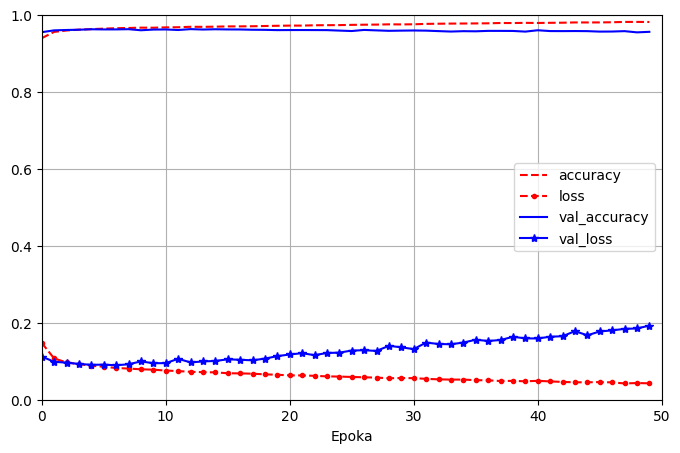

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9551 - loss: 0.1898
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



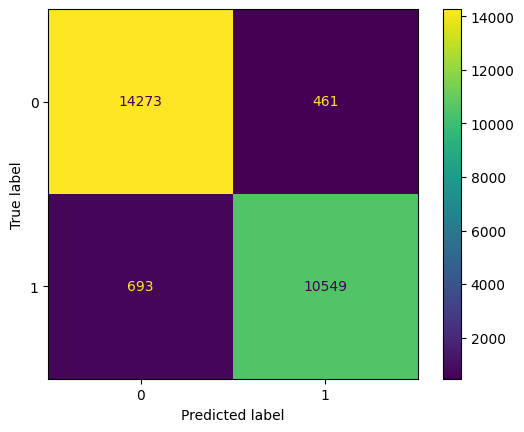

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,825 (179.00 KB)

 Trainable params: 45,825 (179.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9011 - loss: 0.2343 - val_accuracy: 0.9492 - val_loss: 0.1291
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9437 - loss: 0.1349 - val_accuracy: 0.9524 - val_loss: 0.1195
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9498 - loss: 0.1207 - val_accuracy: 0.9498 - val_loss: 0.1225
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9527 - loss: 0.1131 - val_accuracy: 0.9518 - val_loss: 0.1158
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9547 - loss: 0.1078 - val_accuracy: 0.9525 - val_loss: 0.1147
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9558 - loss: 0.1053 - val_accuracy: 0.9556 - val_loss: 0.1049
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9572 - loss: 0.1014 - val_accuracy: 0.9565 - val_loss: 0.1023
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9578 - loss: 0.098

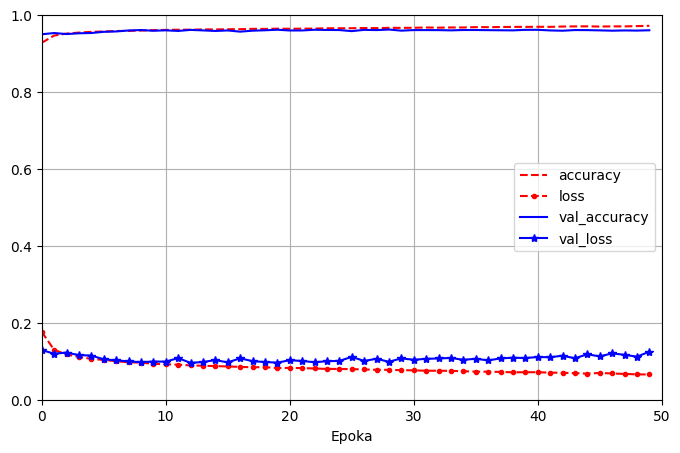

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9591 - loss: 0.1223
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14734
           1       0.97      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



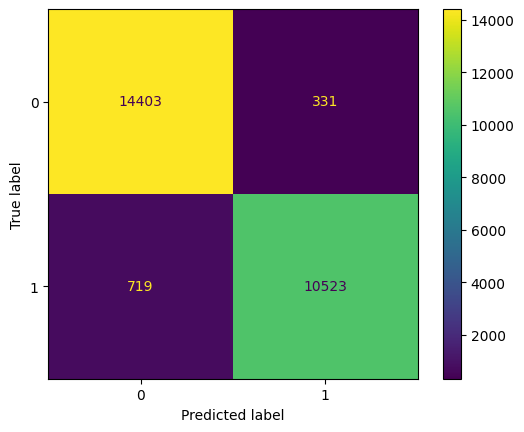

In [ ]:
run_model(df_features_normal)

## Model - adam, with dropout layer

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dropout(0.2),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,913 (339.50 KB)

 Trainable params: 86,913 (339.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5968 - loss: 1.7472 - val_accuracy: 0.7805 - val_loss: 0.5102
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7276 - loss: 0.5428 - val_accuracy: 0.8377 - val_loss: 0.4214
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8306 - loss: 0.3979 - val_accuracy: 0.8109 - val_loss: 0.4492
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8554 - loss: 0.3561 - val_accuracy: 0.8372 - val_loss: 0.4064
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8746 - loss: 0.3064 - val_accuracy: 0.8876 - val_loss: 0.2757
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8961 - loss: 0.2513 - val_accuracy: 0.9017 - val_loss: 0.2447
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9061 - loss: 0.2267 - val_accuracy: 0.8957 - val_loss: 0.2566
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9127 - loss: 0

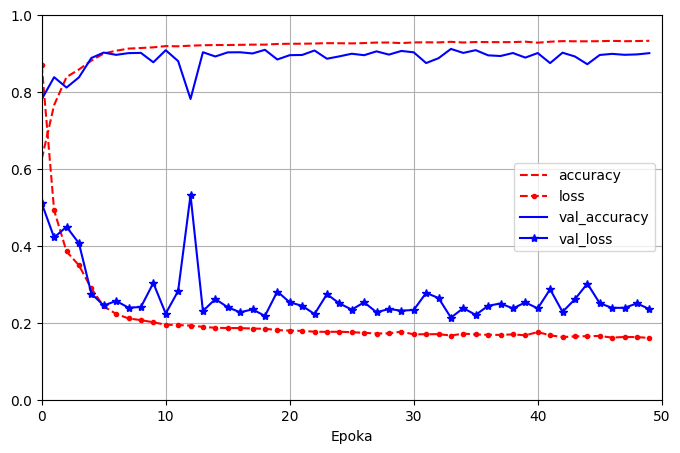

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8979 - loss: 0.2436
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14734
           1       0.99      0.78      0.87     11242

    accuracy                           0.90     25976
   macro avg       0.92      0.89      0.89     25976
weighted avg       0.91      0.90      0.90     25976



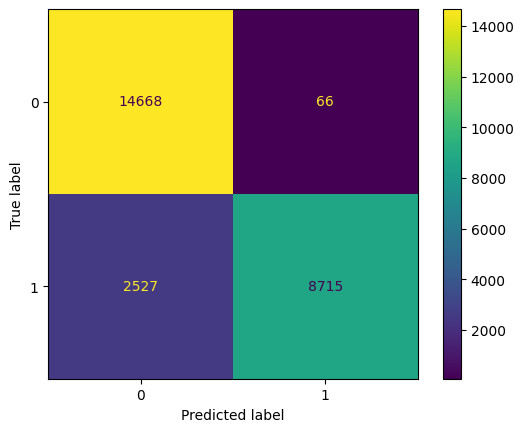

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,913 (339.50 KB)

 Trainable params: 86,913 (339.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9207 - loss: 0.1954 - val_accuracy: 0.9541 - val_loss: 0.1147
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9527 - loss: 0.1155 - val_accuracy: 0.9581 - val_loss: 0.1030
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9574 - loss: 0.1026 - val_accuracy: 0.9593 - val_loss: 0.0971
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9599 - loss: 0.0964 - val_accuracy: 0.9618 - val_loss: 0.0925
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9608 - loss: 0.0937 - val_accuracy: 0.9618 - val_loss: 0.0914
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9624 - loss: 0.0888 - val_accuracy: 0.9625 - val_loss: 0.0904
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9634 - loss: 0.0872 - val_accuracy: 0.9631 - val_loss: 0.0888
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9636 - loss: 0

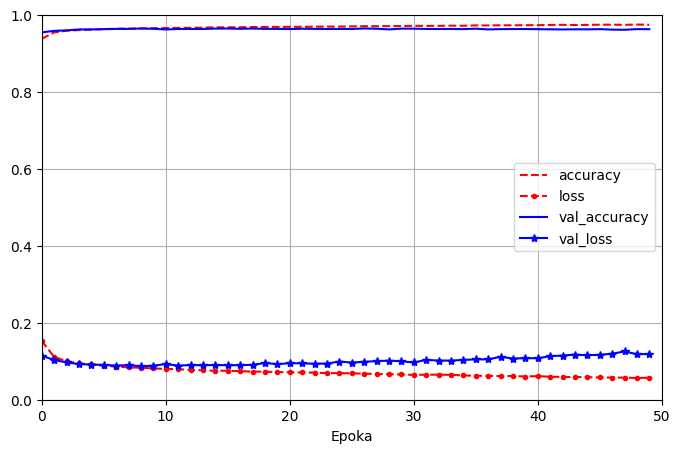

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9613 - loss: 0.1223
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14734
           1       0.97      0.94      0.96     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



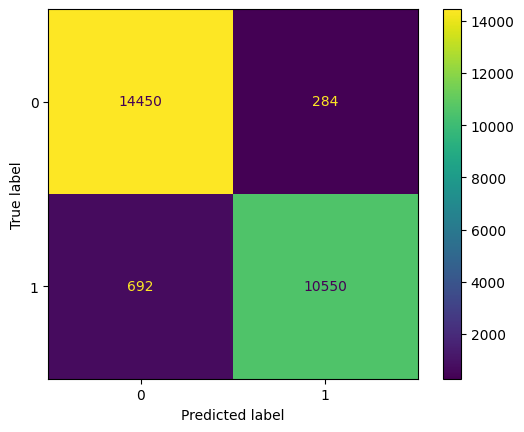

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,913 (339.50 KB)

 Trainable params: 86,913 (339.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3240/3247 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9021 - loss: 0.2372Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9441 - loss: 0.1358 - val_accuracy: 0.9516 - val_loss: 0.1192
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9501 - loss: 0.1211 - val_accuracy: 0.9515 - val_loss: 0.1198
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9527 - loss: 0.1131 - val_accuracy: 0.9585 - val_loss: 0.1035
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9536 - loss: 0.1093 - val_accuracy: 0.9542 - val_loss: 0.1104
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9549 - loss: 0.1055 - val_accuracy: 0.9602 - val_loss: 0.0982
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9555 - loss: 0.1037 - val_accuracy: 0.9606 - val_loss: 0.0974
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9571 - loss: 0.1011 - val_accuracy: 0.9592 - val_loss: 0.1

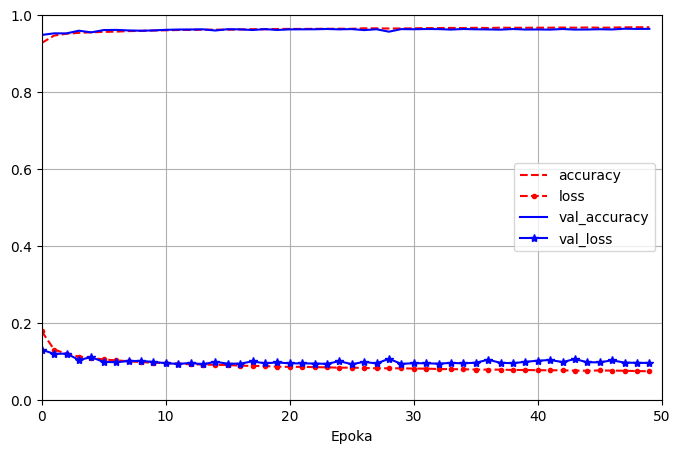

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.0975
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14734
           1       0.97      0.94      0.96     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



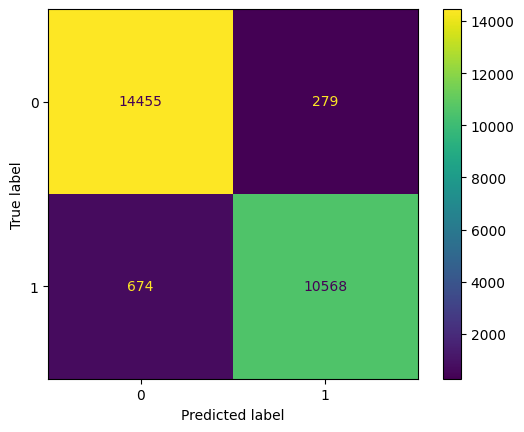

In [ ]:
run_model(df_features_normal)

## Model - adam - learningrate 0.001 200 epochs

In [25]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 200, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,425 (404.00 KB)

 Trainable params: 103,425 (404.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6732 - loss: 1.9375 - val_accuracy: 0.8615 - val_loss: 0.3729
Epoch 2/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8412 - loss: 0.3865 - val_accuracy: 0.8603 - val_loss: 0.3415
Epoch 3/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8565 - loss: 0.3472 - val_accuracy: 0.8651 - val_loss: 0.3068
Epoch 4/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8827 - loss: 0.2839 - val_accuracy: 0.8897 - val_loss: 0.2586
Epoch 5/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9015 - loss: 0.2353 - val_accuracy: 0.9163 - val_loss: 0.2046
Epoch 6/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9111 - loss: 0.2143 - val_accuracy: 0.9115 - val_loss: 0.2159
Epoch 7/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9153 - loss: 0.2032 - val_accuracy: 0.9222 - val_loss: 0.1868
Epoch 8/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9183 - loss: 0

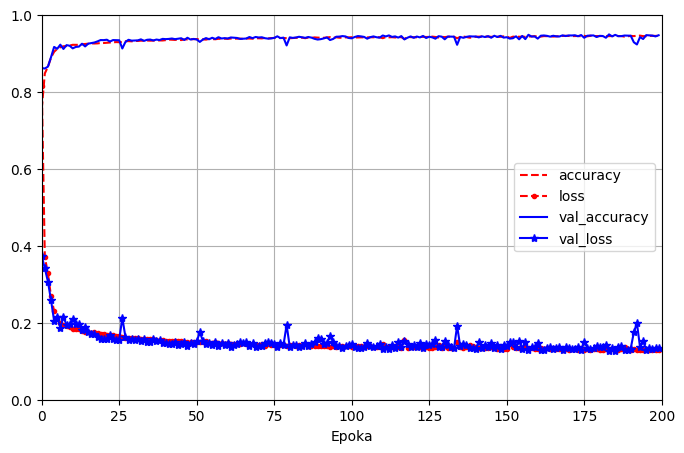

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9440 - loss: 0.1397
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14734
           1       0.95      0.93      0.94     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.95     25976
weighted avg       0.95      0.95      0.95     25976



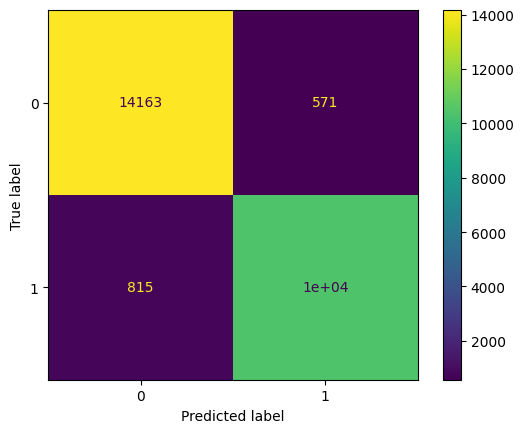

In [26]:
run_model(df_features)

### Standardized data

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,425 (404.00 KB)

 Trainable params: 103,425 (404.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9230 - loss: 0.1890 - val_accuracy: 0.9572 - val_loss: 0.1072
Epoch 2/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9549 - loss: 0.1090 - val_accuracy: 0.9588 - val_loss: 0.0978
Epoch 3/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9592 - loss: 0.0962 - val_accuracy: 0.9602 - val_loss: 0.0938
Epoch 4/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9617 - loss: 0.0916 - val_accuracy: 0.9613 - val_loss: 0.0921
Epoch 5/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9624 - loss: 0.0882 - val_accuracy: 0.9619 - val_loss: 0.0918
Epoch 6/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9643 - loss: 0.0854 - val_accuracy: 0.9621 - val_loss: 0.0916
Epoch 7/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9649 - loss: 0.0827 - val_accuracy: 0.9634 - val_loss: 0.0911
Epoch 8/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9656 - loss: 0

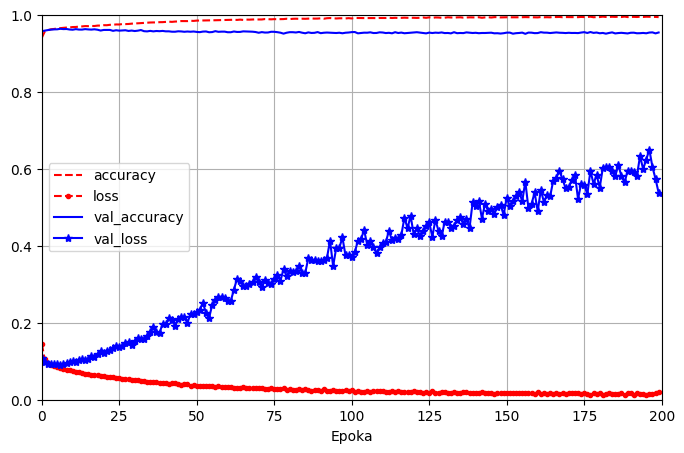

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.9528 - loss: 0.5274
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14734
           1       0.95      0.94      0.95     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



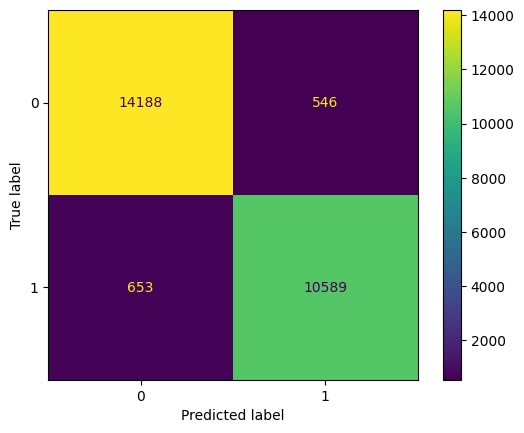

In [27]:
run_model(df_features_std)

### Normalization data

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,425 (404.00 KB)

 Trainable params: 103,425 (404.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9047 - loss: 0.2300 - val_accuracy: 0.9484 - val_loss: 0.1275
Epoch 2/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9441 - loss: 0.1327 - val_accuracy: 0.9534 - val_loss: 0.1161
Epoch 3/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9495 - loss: 0.1197 - val_accuracy: 0.9512 - val_loss: 0.1203
Epoch 4/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9522 - loss: 0.1121 - val_accuracy: 0.9566 - val_loss: 0.1061
Epoch 5/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9544 - loss: 0.1077 - val_accuracy: 0.9557 - val_loss: 0.1054
Epoch 6/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9557 - loss: 0.1043 - val_accuracy: 0.9590 - val_loss: 0.0988
Epoch 7/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9575 - loss: 0.1001 - val_accuracy: 0.9581 - val_loss: 0.1024
Epoch 8/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9587 - loss: 0

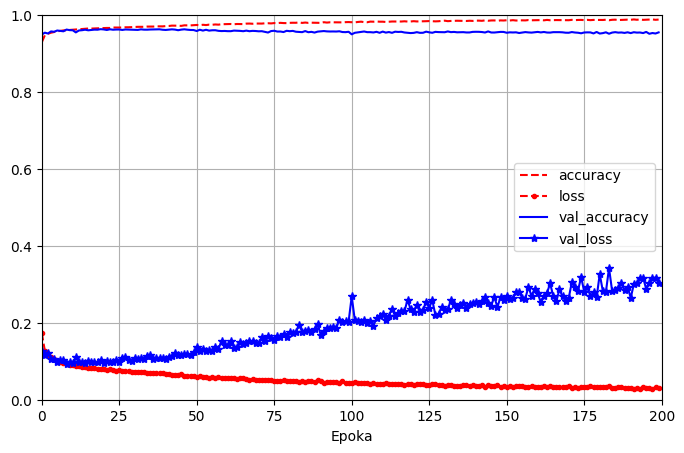

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9543 - loss: 0.3045
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.95      0.94      0.95     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



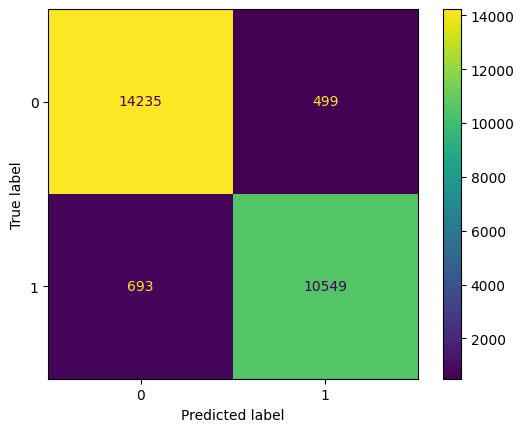

In [28]:
run_model(df_features_normal)

## Model - sgd - different number of neurons

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(128, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Standardized data

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,145 (524.00 KB)

 Trainable params: 134,145 (524.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8680 - loss: 0.3451 - val_accuracy: 0.9338 - val_loss: 0.1668
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9355 - loss: 0.1608 - val_accuracy: 0.9425 - val_loss: 0.1438
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9432 - loss: 0.1395 - val_accuracy: 0.9468 - val_loss: 0.1324
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9477 - loss: 0.1278 - val_accuracy: 0.9501 - val_loss: 0.1248
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9510 - loss: 0.1197 - val_accuracy: 0.9522 - val_loss: 0.1191
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9531 - loss: 0.1138 - val_accuracy: 0.9536 - val_loss: 0.1152
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9547 - loss: 0.1092 - val_accuracy: 0.9538 - val_loss: 0.1124
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9558 - loss: 0

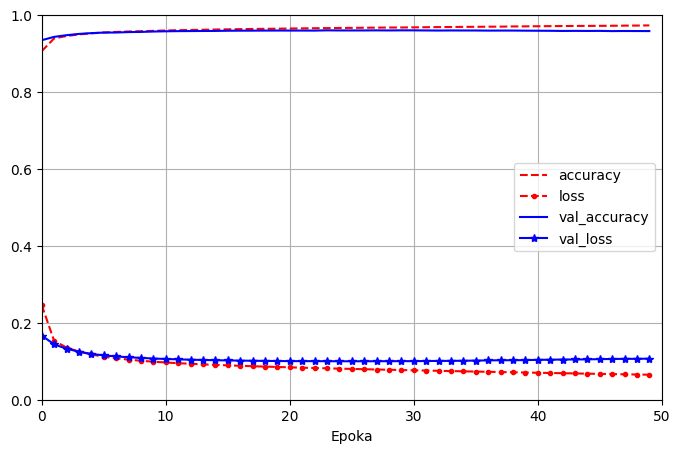

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1081
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14734
           1       0.96      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



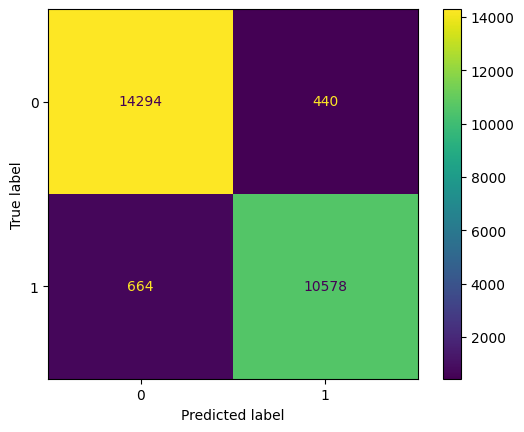

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,145 (524.00 KB)

 Trainable params: 134,145 (524.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7948 - loss: 0.4536 - val_accuracy: 0.9059 - val_loss: 0.2453
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9110 - loss: 0.2240 - val_accuracy: 0.9285 - val_loss: 0.1753
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9266 - loss: 0.1784 - val_accuracy: 0.9390 - val_loss: 0.1543
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9338 - loss: 0.1597 - val_accuracy: 0.9439 - val_loss: 0.1433
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9382 - loss: 0.1490 - val_accuracy: 0.9462 - val_loss: 0.1371
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9406 - loss: 0.1416 - val_accuracy: 0.9478 - val_loss: 0.1323
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9430 - loss: 0.1358 - val_accuracy: 0.9486 - val_loss: 0.1282
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9447 - loss: 0

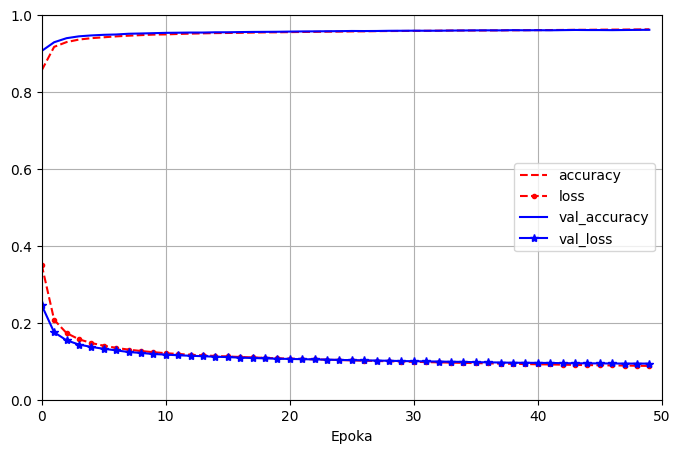

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.0960
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14734
           1       0.97      0.93      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



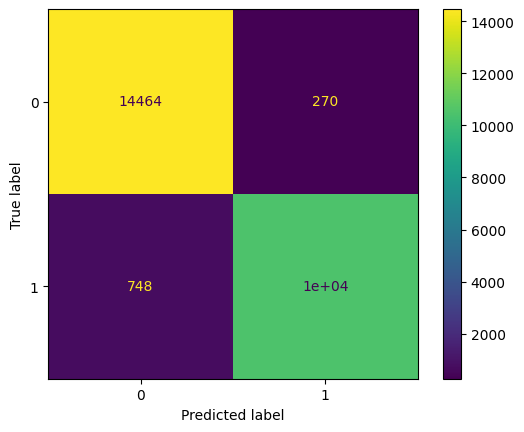

In [ ]:
run_model(df_features_normal)

## Model - sgd - learning_rate 0.001

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])


  model.summary()
  # learning_rate=0.01 - defultowy
  optimizer = SGD(learning_rate=0.001)
  model.compile(optimizer=optimizer,  loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Standardized data

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.7908 - loss: 0.5375 - val_accuracy: 0.8639 - val_loss: 0.3599
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step - accuracy: 0.8683 - loss: 0.3461 - val_accuracy: 0.8817 - val_loss: 0.3132
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 801us/step - accuracy: 0.8838 - loss: 0.3058 - val_accuracy: 0.8937 - val_loss: 0.2841
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 787us/step - accuracy: 0.8955 - loss: 0.2782 - val_accuracy: 0.9034 - val_loss: 0.2608
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step - accuracy: 0.9034 - loss: 0.2559 - val_accuracy: 0.9099 - val_loss: 0.2419
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - accuracy: 0.9101 - loss: 0.2381 - val_accuracy: 0.9140 - val_loss: 0.2274
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - accuracy: 0.9148 - loss: 0.2246 - val_accuracy: 0.9175 - val_loss: 0.2167
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 801us/step - accuracy: 0.9176 -

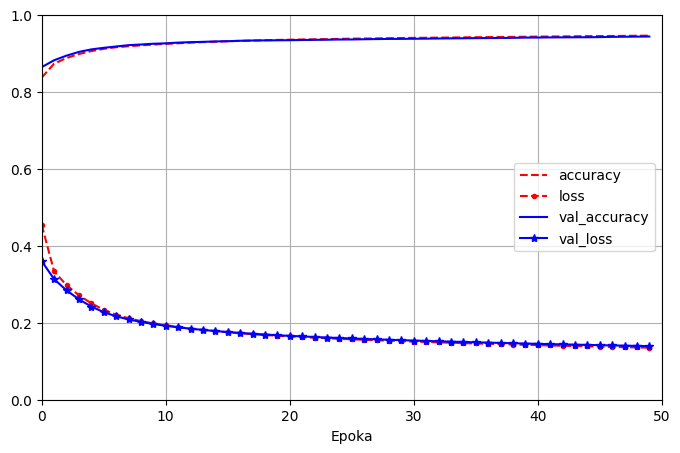

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9418 - loss: 0.1424
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14734
           1       0.95      0.91      0.93     11242

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



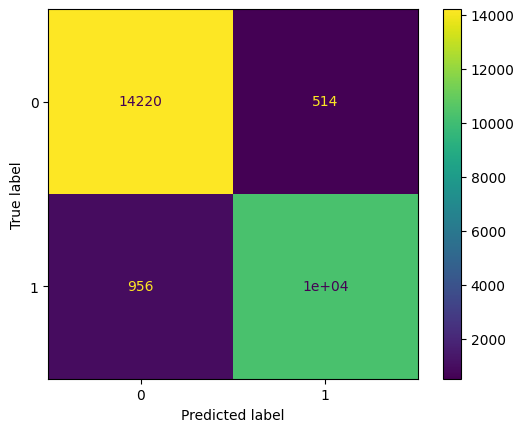

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 781us/step - accuracy: 0.7392 - loss: 0.6374 - val_accuracy: 0.8257 - val_loss: 0.5071
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - accuracy: 0.8276 - loss: 0.4741 - val_accuracy: 0.8317 - val_loss: 0.4067
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - accuracy: 0.8348 - loss: 0.3957 - val_accuracy: 0.8410 - val_loss: 0.3751
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - accuracy: 0.8448 - loss: 0.3691 - val_accuracy: 0.8517 - val_loss: 0.3581
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.8553 - loss: 0.3533 - val_accuracy: 0.8595 - val_loss: 0.3455
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 773us/step - accuracy: 0.8639 - loss: 0.3414 - val_accuracy: 0.8656 - val_loss: 0.3354
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 774us/step - accuracy: 0.8689 - loss: 0.3320 - val_accuracy: 0.8702 - val_loss: 0.3270
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 766us/step - accuracy: 0.8727 -

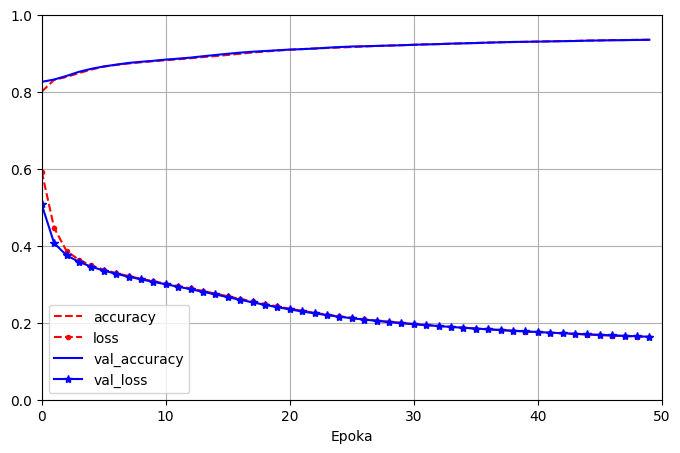

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9326 - loss: 0.1684
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14734
           1       0.94      0.91      0.92     11242

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



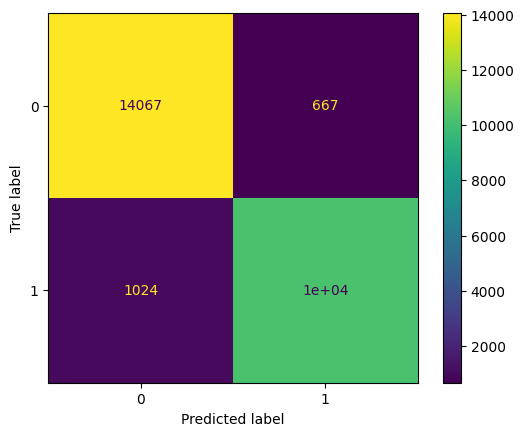

In [ ]:
run_model(df_features_normal)

## Model - sgd - learning_rate rate 0.001 - 200 epochs

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(1, activation='sigmoid')
  ])


  model.summary()
  # learning_rate=0.01 - defultowy
  optimizer = SGD(learning_rate=0.001)
  model.compile(optimizer=optimizer,  loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 200, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Normalization data

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,657 (276.00 KB)

 Trainable params: 70,657 (276.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - accuracy: 0.7049 - loss: 0.6412 - val_accuracy: 0.8174 - val_loss: 0.5240
Epoch 2/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 790us/step - accuracy: 0.8211 - loss: 0.4919 - val_accuracy: 0.8237 - val_loss: 0.4210
Epoch 3/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 813us/step - accuracy: 0.8290 - loss: 0.4087 - val_accuracy: 0.8365 - val_loss: 0.3842
Epoch 4/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.8399 - loss: 0.3780 - val_accuracy: 0.8467 - val_loss: 0.3655
Epoch 5/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 798us/step - accuracy: 0.8509 - loss: 0.3608 - val_accuracy: 0.8556 - val_loss: 0.3523
Epoch 6/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - accuracy: 0.8594 - loss: 0.3485 - val_accuracy: 0.8623 - val_loss: 0.3424
Epoch 7/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.8652 - loss: 0.3392 - val_accuracy: 0.8673 - val_loss: 0.3346
Epoch 8/200
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - accuracy: 

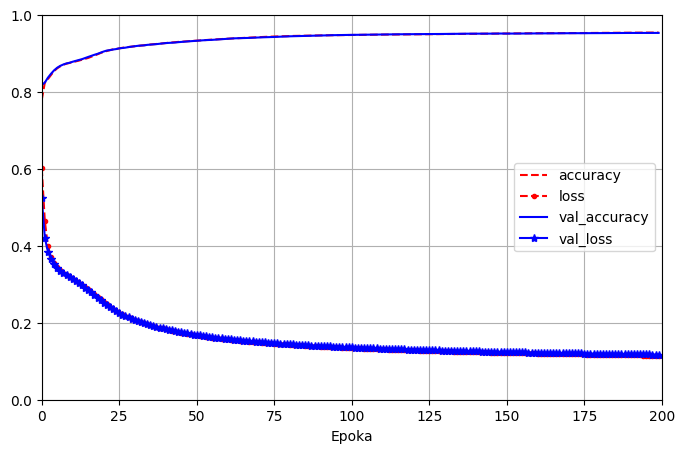

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9508 - loss: 0.1199
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14734
           1       0.96      0.93      0.94     11242

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



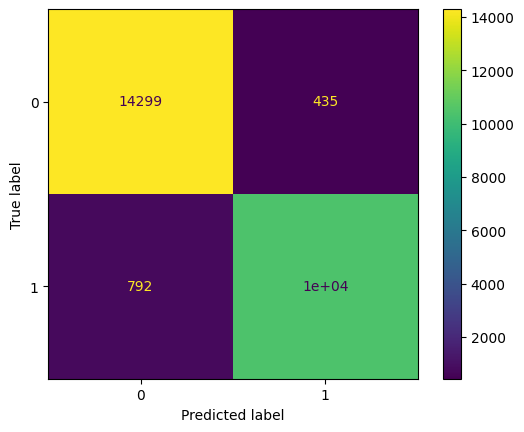

In [ ]:
run_model(df_features_normal)

## Model - adam - more layers and different numbers of neurons

In [ ]:
def run_model(df_features):
  X_train, X_test, y_train, y_test = train_test_split(df_features, df['satisfaction'], test_size=0.2, random_state=42)
  tf.random.set_seed(42)
  model = Sequential([
      Input(shape=X_train.shape[1:]),
      Dense(512, activation='relu'),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(128, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])


  model.summary()
  optimizer = Adam()
  model.compile(optimizer=optimizer,  loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train.values, y_train.values, epochs = 50, validation_data = (X_test.values, y_test.values))
  model_eval(model, history, X_test, y_test)

### Original data

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 512)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,561 (1.99 MB)

 Trainable params: 522,561 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6714 - loss: 0.8246 - val_accuracy: 0.8301 - val_loss: 0.4072
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8561 - loss: 0.3468 - val_accuracy: 0.9018 - val_loss: 0.2455
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8895 - loss: 0.2691 - val_accuracy: 0.9117 - val_loss: 0.2160
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9028 - loss: 0.2340 - val_accuracy: 0.8408 - val_loss: 0.3697
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9075 - loss: 0.2203 - val_accuracy: 0.9103 - val_loss: 0.2177
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9143 - loss: 0.2056 - val_accuracy: 0.9037 - val_loss: 0.2405
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9100 - loss: 0.2176 - val_accuracy: 0.9212 - val_loss: 0.1896
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9187 - loss: 0.1947 - 

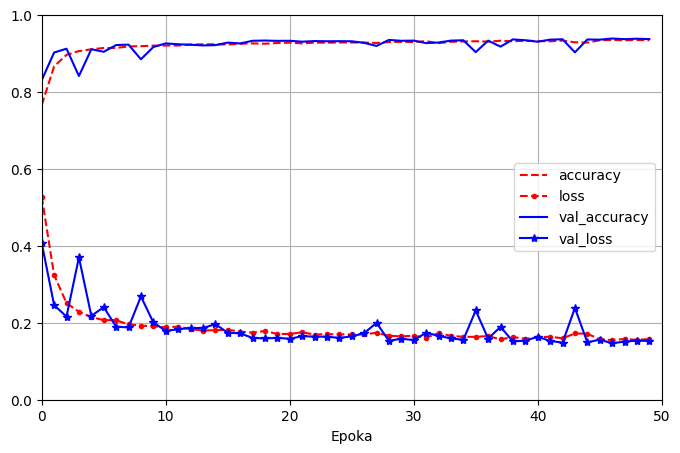

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9331 - loss: 0.1584
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14734
           1       0.93      0.93      0.93     11242

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



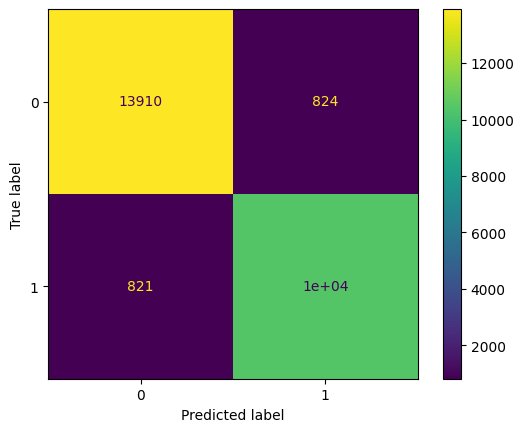

In [ ]:
run_model(df_features)

### Standardized data

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 512)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,561 (1.99 MB)

 Trainable params: 522,561 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9239 - loss: 0.1905 - val_accuracy: 0.9555 - val_loss: 0.1060
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9547 - loss: 0.1105 - val_accuracy: 0.9582 - val_loss: 0.0989
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9586 - loss: 0.0999 - val_accuracy: 0.9617 - val_loss: 0.0939
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9603 - loss: 0.0947 - val_accuracy: 0.9621 - val_loss: 0.0929
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9620 - loss: 0.0899 - val_accuracy: 0.9577 - val_loss: 0.0959
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9630 - loss: 0.0887 - val_accuracy: 0.9622 - val_loss: 0.0918
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9633 - loss: 0.0855 - val_accuracy: 0.9637 - val_loss: 0.0895
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9637 - loss: 0.0851 - 

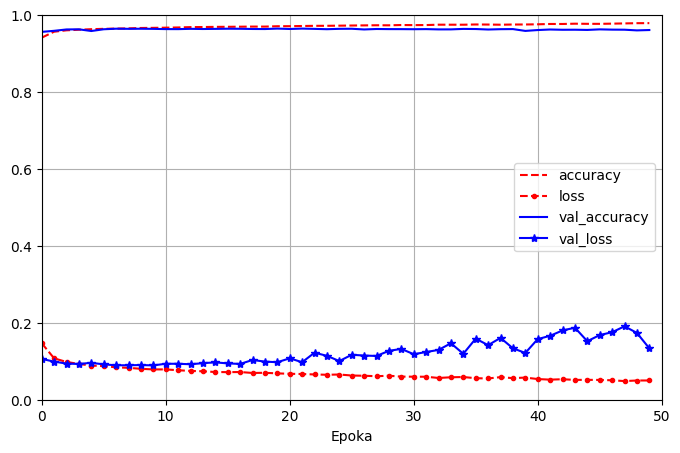

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9602 - loss: 0.1363
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14734
           1       0.97      0.94      0.95     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



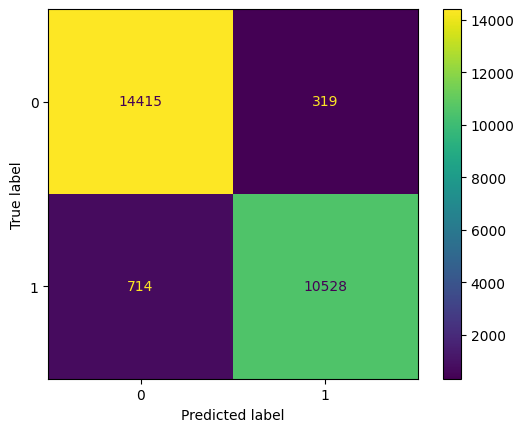

In [ ]:
run_model(df_features_std)

### Normalization data

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 512)                 │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,561 (1.99 MB)

 Trainable params: 522,561 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9045 - loss: 0.2306 - val_accuracy: 0.9300 - val_loss: 0.1639
Epoch 2/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9434 - loss: 0.1353 - val_accuracy: 0.9523 - val_loss: 0.1180
Epoch 3/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9491 - loss: 0.1230 - val_accuracy: 0.9468 - val_loss: 0.1286
Epoch 4/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9515 - loss: 0.1156 - val_accuracy: 0.9549 - val_loss: 0.1097
Epoch 5/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9535 - loss: 0.1093 - val_accuracy: 0.9538 - val_loss: 0.1130
Epoch 6/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9544 - loss: 0.1056 - val_accuracy: 0.9574 - val_loss: 0.1035
Epoch 7/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9558 - loss: 0.1028 - val_accuracy: 0.9560 - val_loss: 0.1100
Epoch 8/50
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9579 - loss: 0.0985 - 

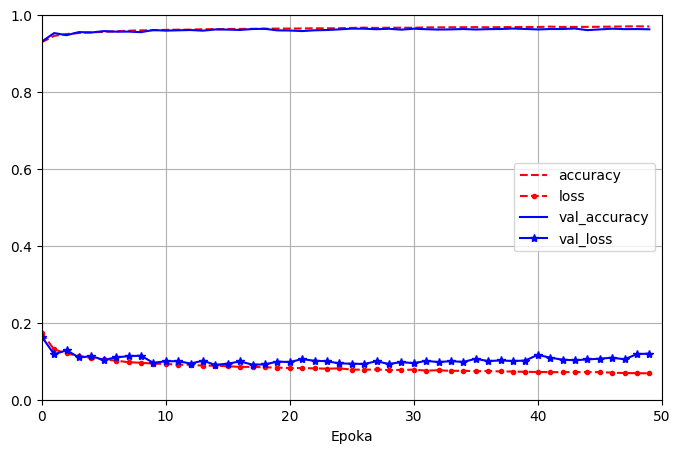

Ocena modelu:
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9611 - loss: 0.1224
Prognoza modelu
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14734
           1       0.97      0.94      0.96     11242

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



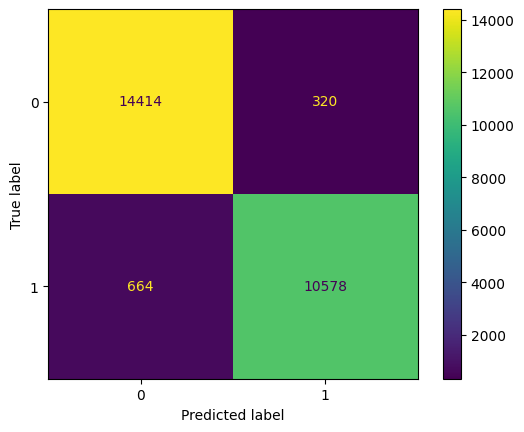

In [ ]:
run_model(df_features_normal)